In [ ]:
import uproot
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import math 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel

In [ ]:
num_round_polm80=400
num_round_polp80=400
num_plot_polm80_min=0
num_plot_polm80_max=0
num_plot_polp80_min=0
num_plot_polp80_max=0

In [ ]:
#H1_mass_array= tree_polm80_hhz_signal.array("comb_jet1_mass")
file_polm80_hhz_signal=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polm80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_hhqq_14364.root")
file_polm80_hzqq_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polm80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_hzqq_13391.root")
file_polm80_ee_qq_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polm80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_ee_qq_13399_to_13402.root")
file_polm80_ee_qqqq_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polm80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_ee_qqqq_13394_to_13397.root")
file_polm80_ee_qqqqqq_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polm80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_ee_qqqqqq.root")
file_polm80_WWH_qqqqH_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polm80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_WWH_qqqqH_14734.root")
file_polm80_ZZH_qqqqH_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polm80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_ZZH_qqqqH_14726.root")


tree_polm80_hhz_signal = file_polm80_hhz_signal["MVATrainingVariables"]
tree_polm80_hhz_signal.keys()
tree_polm80_hzqq_BG = file_polm80_hzqq_BG["MVATrainingVariables"]
tree_polm80_hzqq_BG = file_polm80_hzqq_BG["MVATrainingVariables"]
tree_polm80_ee_qq_BG = file_polm80_ee_qq_BG["MVATrainingVariables"]
tree_polm80_ee_qqqq_BG = file_polm80_ee_qqqq_BG["MVATrainingVariables"]
tree_polm80_ee_qqqqqq_BG = file_polm80_ee_qqqqqq_BG["MVATrainingVariables"]
tree_polm80_WWH_qqqqH_BG = file_polm80_WWH_qqqqH_BG["MVATrainingVariables"]
tree_polm80_ZZH_qqqqH_BG = file_polm80_ZZH_qqqqH_BG["MVATrainingVariables"]
#H1_mass_array= tree_polm80_hhz_signal.array("comb_jet1_mass")
#feature: jet6_theta, importance: 0.006951884366571903
#feature: jet4_theta, importance: 0.0081394137814641
#feature: jet5_theta, importance: 0.008377623744308949
#feature: jet4_E, importance: 0.008673656731843948
#feature: comb_jet2_BTagMax, importance: 0.008875861763954163
#feature: jet3_E, importance: 0.009489532560110092

#feature: jet6_theta, importance: 0.007176658604294062
#feature: jet4_E, importance: 0.007868878543376923
#feature: jet5_theta, importance: 0.00789350364357233
#feature: jet4_theta, importance: 0.00875063892453909
#feature: comb_jet3_BTagMax, importance: 0.009214065968990326
#feature: comb_jet2_BTagMax, importance: 0.009325340390205383


df_polm80_HHZ=tree_polm80_hhz_signal.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
#df_polm80_HHZ=df_polm80_HHZ.drop(['jet6_theta', 'jet6_E','jet4_theta','jet4_E','jet3_E'], axis=1)
df_polm80_HHZ[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[1,0,0,0,0,0,0]], index=df_polm80_HHZ.index)
df_polm80_HHZ.to_csv("dataframe_polm80_SIG.csv")
df_polm80_BG=tree_polm80_hzqq_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
#drop less important features <1 % and check
df_polm80_BG[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,1,0,0,0,0,0]], index=df_polm80_BG.index)
df_polm80_ee_qq=tree_polm80_ee_qq_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polm80_ee_qq[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,0,1,0,0,0,0]], index=df_polm80_ee_qq.index)
df_polm80_BG=df_polm80_BG.append(df_polm80_ee_qq,ignore_index=True)
df_polm80_ee_qqqq=tree_polm80_ee_qqqq_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polm80_ee_qqqq[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,0,0,1,0,0,0]], index=df_polm80_ee_qqqq.index)
df_polm80_BG=df_polm80_BG.append(df_polm80_ee_qqqq,ignore_index=True)
df_polm80_ee_qqqqqq=tree_polm80_ee_qqqqqq_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polm80_ee_qqqqqq[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,0,0,0,1,0,0]], index=df_polm80_ee_qqqqqq.index)
df_polm80_BG=df_polm80_BG.append(df_polm80_ee_qqqqqq,ignore_index=True)
df_polm80_WWH_qqqqH=tree_polm80_WWH_qqqqH_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polm80_WWH_qqqqH[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,0,0,0,0,1,0]], index=df_polm80_WWH_qqqqH.index)
df_polm80_BG=df_polm80_BG.append(df_polm80_WWH_qqqqH,ignore_index=True)
df_polm80_ZZH_qqqqH=tree_polm80_ZZH_qqqqH_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polm80_ZZH_qqqqH[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,0,0,0,0,0,1]], index=df_polm80_ZZH_qqqqH.index)
df_polm80_BG=df_polm80_BG.append(df_polm80_ZZH_qqqqH,ignore_index=True)
#df_polm80_BG=df_polm80_BG.drop(['jet6_theta', 'jet6_E','jet4_theta','jet4_E','jet3_E'], axis=1)
#polm80 after loop best result now for thresh 0 1.9231107313597056 7.1626043831929564 6.709212450077757
#using ALL the variables
#Sig, BG, sum, metric 4.672464674082233 9.709791960194707 14.489369597285986 24.199161557480693 1.973830090641824 1.9844308321733362
#but also that
#polm80 after loop best result now for thresh 0 2.0675560241257993 4.746041810140014 0.5232050677295774



#drop weight column here
Y_polm80_HHZ=np.ones((df_polm80_HHZ.shape[0],1))
#print("shape of data frame BG after",df_polm80_BG.shape,df_polm80_BG.tail())
Y_polm80_BG=np.zeros((df_polm80_BG.shape[0],1))
#print ("polm80 shape of Ysig, back",Y_polm80_HHZ.shape,Y_polm80_BG.shape)
df_polm80_HHZ.head()
df_polm80_total=df_polm80_HHZ.append(df_polm80_BG,ignore_index=True)



y_polm80_total=np.append(Y_polm80_HHZ,Y_polm80_BG)
X_polm80_total=np.asarray(df_polm80_total)
test_size_polm80=0.2
X_polm80_train, X_polm80_test, y_polm80_train, y_polm80_test = train_test_split(df_polm80_total, y_polm80_total, test_size=test_size_polm80)
print("polm80 shape of X_train/X_test/y_train/y_test",X_polm80_train.shape, X_polm80_test.shape, y_polm80_train.shape, y_polm80_test.shape)

sel_HHZ_polm80_train=X_polm80_train['HHZ'].to_numpy(dtype=int, copy=False)
sel_hzqq_polm80_train=X_polm80_train['hzqq'].to_numpy(dtype=int, copy=False)
sel_ee_qq_polm80_train=X_polm80_train['ee_qq'].to_numpy(dtype=int, copy=False)
sel_ee_qqqq_polm80_train=X_polm80_train['ee_qqqq'].to_numpy(dtype=int, copy=False)
sel_ee_qqqqqq_polm80_train=X_polm80_train['ee_qqqqqq'].to_numpy(dtype=int, copy=False)
sel_WWH_qqqqH_polm80_train=X_polm80_train['WWH_qqqqH'].to_numpy(dtype=int, copy=False)
sel_ZZH_qqqqH_polm80_train=X_polm80_train['ZZH_qqqqH'].to_numpy(dtype=int, copy=False)
sel_HHZ_polm80_test=X_polm80_test['HHZ'].to_numpy(dtype=int, copy=False)
sel_hzqq_polm80_test=X_polm80_test['hzqq'].to_numpy(dtype=int, copy=False)
sel_ee_qq_polm80_test=X_polm80_test['ee_qq'].to_numpy(dtype=int, copy=False)
sel_ee_qqqq_polm80_test=X_polm80_test['ee_qqqq'].to_numpy(dtype=int, copy=False)
sel_ee_qqqqqq_polm80_test=X_polm80_test['ee_qqqqqq'].to_numpy(dtype=int, copy=False)
sel_WWH_qqqqH_polm80_test=X_polm80_test['WWH_qqqqH'].to_numpy(dtype=int, copy=False)
sel_ZZH_qqqqH_polm80_test=X_polm80_test['ZZH_qqqqH'].to_numpy(dtype=int, copy=False)

#last 7 columns should be all labelling of the different samples, so take it out to define the matrix
data_polm80_train=X_polm80_train.iloc[:,1:-7]

weight_polm80_train = X_polm80_train.iloc[:,0]
weight_polm80_test = X_polm80_test.iloc[:,0]
weight_polm80_array_test=np.asarray(weight_polm80_test)
weight_polm80_array_train=np.asarray(weight_polm80_train)

weights_polm80_test_B=np.ma.masked_where(y_polm80_test==1,weight_polm80_array_test)
weights_polm80_test_S=np.ma.masked_where(y_polm80_test==0,weight_polm80_array_test)
#print("test all weights",np.sum(weight_polm80_array_test),np.sum(weights_polm80_test_B),np.sum(weights_polm80_test_S))

sum_wpos_train_polm80 = sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if y_polm80_train[i] == 1.0)
sum_wneg_train_polm80 = sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if y_polm80_train[i] == 0.0)
sum_tot_hhz_train_polm80= sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if sel_HHZ_polm80_train[i]==1)
sum_tot_hzqq_train_polm80= sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if sel_hzqq_polm80_train[i]==1)
sum_tot_ee_qq_train_polm80= sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if sel_ee_qq_polm80_train[i]==1)
sum_tot_ee_qqqq_train_polm80= sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if sel_ee_qqqq_polm80_train[i]==1)
sum_tot_ee_qqqqqq_train_polm80= sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if sel_ee_qqqqqq_polm80_train[i]==1)
sum_tot_WWH_qqqqH_train_polm80= sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if sel_WWH_qqqqH_polm80_train[i]==1)
sum_tot_ZZH_qqqqH_train_polm80= sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if sel_ZZH_qqqqH_polm80_train[i]==1)

sum_tot_hhz_test_polm80= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if sel_HHZ_polm80_test[i]==1)
sum_tot_hzqq_test_polm80= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if sel_hzqq_polm80_test[i]==1)
sum_tot_ee_qq_test_polm80= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if sel_ee_qq_polm80_test[i]==1)
sum_tot_ee_qqqq_test_polm80= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if sel_ee_qqqq_polm80_test[i]==1)
sum_tot_ee_qqqqqq_test_polm80= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if sel_ee_qqqqqq_polm80_test[i]==1)
sum_tot_WWH_qqqqH_test_polm80= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if sel_WWH_qqqqH_polm80_test[i]==1)
sum_tot_ZZH_qqqqH_test_polm80= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if sel_ZZH_qqqqH_polm80_test[i]==1)


sum_wpos_test_polm80 = sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if y_polm80_test[i] == 1.0)
sum_wneg_test_polm80 = sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if y_polm80_test[i] == 0.0)

#calculate renormalisation weights to plot normalized histograms, normalize everthing to sum_wpos
rescale_polm80_train_BG=sum_wpos_train_polm80/sum_wneg_train_polm80 
recale_polm80_test_SIG=sum_wpos_train_polm80/sum_wpos_test_polm80
recale_polm80_test_BG=sum_wpos_train_polm80/sum_wneg_test_polm80

scale_pos_weight_train_polm80 = sum_wneg_train_polm80/sum_wpos_train_polm80
data_polm80_test=X_polm80_test.iloc[:,1:-7]

In [ ]:
xgmat_polm80_train = xgb.DMatrix( data_polm80_train, label=y_polm80_train, missing = -999.0, weight=weight_polm80_train )
xgmat_polm80_test = xgb.DMatrix( data_polm80_test, missing = -999.0, weight=weight_polm80_test )
watchlist_polm80 = [(xgmat_polm80_train, 'train'), (xgmat_polm80_test , 'validation')]
#param_polm80 = {'seed': 7,'base_score': 0.5,'subsample':1,'max_delta_step':0,'max_depth': 6, 'eta': 0.05, 'objective': 'binary:logitraw','nthread':4, 'scale_pos_weight': scale_pos_weight_train_polm80, 'eval_metric': ['error','auc'],'evals': watchlist_polm80, 'early_stopping_round': 10,
#                'gamma': 0, 'min_child_weight': 1,'lambda': 1, 'alpha': 0,'tree_method':'exact','subsample':1,
#                'colsample_bytree': 1,'colsample_bylevel':1,'colsample_bynote': 1}
param_polm80 = {'seed': 7,'base_score': 0.5,'subsample':1,'max_delta_step':0,'max_depth': 6, 'eta': 0.01, 'objective': 'binary:logitraw','nthread':4, 'scale_pos_weight': scale_pos_weight_train_polm80, 'eval_metric': ['error','auc'],'evals': watchlist_polm80, 'early_stopping_round': 10,
                'gamma': 0, 'min_child_weight': 1,'lambda': 1, 'alpha': 0,'tree_method':'exact','subsample':1,
                'colsample_bytree': 1,'colsample_bylevel':1,'colsample_bynote': 1}
#    parameters = {
#        'num_boost_round': [100, 250, 500],
#        'eta': [0.05, 0.1, 0.3],
#        'max_depth': [6, 9, 12],
#        'subsample': [0.9, 1.0],
#        'colsample_bytree': [0.9, 1.0],
#    }
#    clf = GridSearchCV(clf, parameters, n_jobs=1, cv=2)



print("before training polm80")
XGB_Model_polm80 =xgb.train(param_polm80,xgmat_polm80_train,num_boost_round=num_round_polm80,verbose_eval=True)
print("after training polm80")

In [ ]:
XGB_Model_polm80.save_model("/Users/matthiasweber/jupytermacros/HHZModel_polm80.model")
modelfile_polm80 = '/Users/matthiasweber/jupytermacros/HHZModel_polm80.model'
print('model saved')
cross_val_polm80 = xgb.cv(param_polm80,xgmat_polm80_train, num_boost_round=num_round_polm80, nfold=10, early_stopping_rounds=10, metrics=['error','auc'], verbose_eval=True)

if XGB_Model_polm80.best_ntree_limit != num_round_polm80 :
    print("after training polpm0 found cutoff",XGB_Model_polm80.best_score,XGB_Model_polm80.best_ntree_limit,XGB_Model_polm80.best_iteration)
else:
    print("after training polm80",XGB_Model_polm80.best_ntree_limit,XGB_Model_polm80.best_iteration)

In [13]:
XGB_Model_polm80_sklearn =xgb.XGBClassifier()
param_polm80_skl = {'random_state': 7,'base_score': 0.5,'subsample':1,'max_delta_step':0,'max_depth': 7, 
                    'learning_rate': 0.01, 'objective': 'binary:logitraw','n_jobs':4, 
                    'scale_pos_weight': scale_pos_weight_train_polm80, 'early_stopping_round': 10,
                    'gamma': 0, 'min_child_weight': 1,'reg_lambda': 1, 'reg_alpha': 1.5,'tree_method':'exact',
                    'subsample':1,'importance_type': "gain",'verbosity': 2,
                    'colsample_bytree': 1,'colsample_bylevel':1,'colsample_bynote': 1,
                    'n_estimators': num_round_polm80}
XGB_Model_polm80_sklearn.set_params(**param_polm80_skl)
#XGB_Model_polm80_sklearn.set_params(random_state=7,tree_method="exact",max_delta_step=0,n_estimators =num_round_polm80, scale_pos_weight=scale_pos_weight_train_polm80, max_depth=6, learning_rate=0.05, objective='binary:logitraw',n_jobs=4, verbosity=2,importance_type="gain",
#                                            gamma= 0, min_child_weight=1,reg_lambda= 1,reg_alpha=0,base_score=0.5,
#                                    subsample=1,colsample_bytree=1,colsample_bylevel=1,colsample_bynode=1.0)
print("before fittin sklearn polm80")
#XGB_Model_polm80_sklearnfit=XGB_Model_polm80_sklearn.fit(X=data_polm80_train, y=y_polm80_train, sample_weight=weight_polm80_train, early_stopping_rounds=10)
XGB_Model_polm80_sklearnfit=XGB_Model_polm80_sklearn.fit(X=data_polm80_train, y=y_polm80_train, sample_weight=weight_polm80_train, sample_weight_eval_set=[weight_polm80_train,weight_polm80_test],eval_metric= ['error','auc'],eval_set=[(data_polm80_train,y_polm80_train),(data_polm80_test,y_polm80_test)], early_stopping_rounds=10)
print("after fitting sklearn polm80",XGB_Model_polm80_sklearnfit.best_score,XGB_Model_polm80_sklearnfit.best_ntree_limit,XGB_Model_polm80_sklearnfit.best_iteration)
#evals_result_polm80_sklearn = XGB_Model_polm80_sklearn.evals_result()
XGB_Model_polm80_sklearn_le = LabelEncoder().fit(y_polm80_test)
#ypred_polm80_test_skl_1 = XGB_Model_polm80_sklearn.predict(data_polm80_test)
modelfile_polm80_sklearn="/Users/matthiasweber/jupytermacros/HHZModel_polm80_skl_BTag3_2_20.model"
XGB_Model_polm80_sklearn.save_model(modelfile_polm80_sklearn)
#print("eval results",evals_result_polm80_sklearn)
#print("feature importance",XGB_Model_polm80_sklearn.feature_importances_)

before fittin sklearn polm80
[19:57:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 242 extra nodes, 0 pruned nodes, max_depth=7
[0]	validation_0-error:0.001969	validation_0-auc:0.902264	validation_1-error:0.00187	validation_1-auc:0.867577
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[19:57:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 244 extra nodes, 0 pruned nodes, max_depth=7
[1]	validation_0-error:0.001969	validation_0-auc:0.909151	validation_1-error:0.00187	validation_1-auc:0.875056
[19:57:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 242 extra nodes, 0 pruned nodes, max_depth=7
[2]	validation_0-error:0.001969	validation_0-auc:0.908525	validation_1-error:0.00187	validation_1-auc:0.874366
[19:57:37] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 244 extra nodes, 0 pruned nodes, max_depth=7
[3]	v

[19:57:59] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 224 extra nodes, 0 pruned nodes, max_depth=7
[35]	validation_0-error:0.007396	validation_0-auc:0.930721	validation_1-error:0.007948	validation_1-auc:0.895476
[19:58:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 236 extra nodes, 0 pruned nodes, max_depth=7
[36]	validation_0-error:0.009039	validation_0-auc:0.930948	validation_1-error:0.009399	validation_1-auc:0.89589
[19:58:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 238 extra nodes, 0 pruned nodes, max_depth=7
[37]	validation_0-error:0.010158	validation_0-auc:0.931138	validation_1-error:0.010452	validation_1-auc:0.895972
[19:58:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 234 extra nodes, 0 pruned nodes, max_depth=7
[38]	validation_0-error:0.011482	validation_0-auc:0.931315	validation_1-error:0.01157	validation_1-auc:0.896302
[19:58:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 

[19:58:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 230 extra nodes, 0 pruned nodes, max_depth=7
[71]	validation_0-error:0.034313	validation_0-auc:0.93963	validation_1-error:0.04222	validation_1-auc:0.904274
[19:58:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 238 extra nodes, 0 pruned nodes, max_depth=7
[72]	validation_0-error:0.034749	validation_0-auc:0.939878	validation_1-error:0.041621	validation_1-auc:0.90455
[19:58:25] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 244 extra nodes, 0 pruned nodes, max_depth=7
[73]	validation_0-error:0.034886	validation_0-auc:0.94009	validation_1-error:0.042975	validation_1-auc:0.904768
[19:58:26] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 240 extra nodes, 0 pruned nodes, max_depth=7
[74]	validation_0-error:0.035147	validation_0-auc:0.940366	validation_1-error:0.043405	validation_1-auc:0.905024
[19:58:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 24

[19:58:47] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 234 extra nodes, 0 pruned nodes, max_depth=7
[107]	validation_0-error:0.043332	validation_0-auc:0.946303	validation_1-error:0.050738	validation_1-auc:0.909259
[19:58:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 244 extra nodes, 0 pruned nodes, max_depth=7
[108]	validation_0-error:0.043336	validation_0-auc:0.946499	validation_1-error:0.051281	validation_1-auc:0.909387
[19:58:48] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 236 extra nodes, 0 pruned nodes, max_depth=7
[109]	validation_0-error:0.043443	validation_0-auc:0.946627	validation_1-error:0.051456	validation_1-auc:0.909482
[19:58:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 230 extra nodes, 0 pruned nodes, max_depth=7
[110]	validation_0-error:0.043514	validation_0-auc:0.946781	validation_1-error:0.051714	validation_1-auc:0.909588
[19:58:49] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 r

[19:59:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 232 extra nodes, 0 pruned nodes, max_depth=7
[143]	validation_0-error:0.046931	validation_0-auc:0.951188	validation_1-error:0.054124	validation_1-auc:0.912333
[19:59:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 234 extra nodes, 0 pruned nodes, max_depth=7
[144]	validation_0-error:0.047386	validation_0-auc:0.951336	validation_1-error:0.054286	validation_1-auc:0.912486
[19:59:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 234 extra nodes, 0 pruned nodes, max_depth=7
[145]	validation_0-error:0.047493	validation_0-auc:0.951466	validation_1-error:0.054438	validation_1-auc:0.912562
[19:59:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 230 extra nodes, 0 pruned nodes, max_depth=7
[146]	validation_0-error:0.047258	validation_0-auc:0.951608	validation_1-error:0.054395	validation_1-auc:0.912674
[19:59:10] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 r

[19:59:29] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 218 extra nodes, 0 pruned nodes, max_depth=7
[179]	validation_0-error:0.047547	validation_0-auc:0.955605	validation_1-error:0.059031	validation_1-auc:0.915332
[19:59:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 234 extra nodes, 0 pruned nodes, max_depth=7
[180]	validation_0-error:0.047605	validation_0-auc:0.955735	validation_1-error:0.059176	validation_1-auc:0.915424
[19:59:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 212 extra nodes, 0 pruned nodes, max_depth=7
[181]	validation_0-error:0.047648	validation_0-auc:0.955827	validation_1-error:0.059147	validation_1-auc:0.915462
[19:59:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 234 extra nodes, 0 pruned nodes, max_depth=7
[182]	validation_0-error:0.047561	validation_0-auc:0.955937	validation_1-error:0.059151	validation_1-auc:0.915543
[19:59:32] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 r

[19:59:50] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 174 extra nodes, 0 pruned nodes, max_depth=7
[215]	validation_0-error:0.047273	validation_0-auc:0.959325	validation_1-error:0.06266	validation_1-auc:0.917797
[19:59:51] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 222 extra nodes, 0 pruned nodes, max_depth=7
[216]	validation_0-error:0.047272	validation_0-auc:0.959424	validation_1-error:0.062781	validation_1-auc:0.917875
[19:59:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 206 extra nodes, 0 pruned nodes, max_depth=7
[217]	validation_0-error:0.047172	validation_0-auc:0.959519	validation_1-error:0.062687	validation_1-auc:0.917923
[19:59:52] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 202 extra nodes, 0 pruned nodes, max_depth=7
[218]	validation_0-error:0.047207	validation_0-auc:0.959629	validation_1-error:0.062657	validation_1-auc:0.917975
[19:59:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 ro

[20:00:13] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 192 extra nodes, 0 pruned nodes, max_depth=7
[251]	validation_0-error:0.047204	validation_0-auc:0.962405	validation_1-error:0.062648	validation_1-auc:0.919555
[20:00:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 240 extra nodes, 0 pruned nodes, max_depth=7
[252]	validation_0-error:0.047228	validation_0-auc:0.962493	validation_1-error:0.062672	validation_1-auc:0.919593
[20:00:14] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 196 extra nodes, 0 pruned nodes, max_depth=7
[253]	validation_0-error:0.047185	validation_0-auc:0.962557	validation_1-error:0.062895	validation_1-auc:0.919625
[20:00:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 216 extra nodes, 0 pruned nodes, max_depth=7
[254]	validation_0-error:0.047175	validation_0-auc:0.962632	validation_1-error:0.062896	validation_1-auc:0.919697
[20:00:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 r

[20:00:34] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 186 extra nodes, 0 pruned nodes, max_depth=7
[287]	validation_0-error:0.047263	validation_0-auc:0.964906	validation_1-error:0.064052	validation_1-auc:0.920874
[20:00:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 166 extra nodes, 0 pruned nodes, max_depth=7
[288]	validation_0-error:0.047401	validation_0-auc:0.964967	validation_1-error:0.064004	validation_1-auc:0.920893
[20:00:35] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 204 extra nodes, 0 pruned nodes, max_depth=7
[289]	validation_0-error:0.04743	validation_0-auc:0.96504	validation_1-error:0.063981	validation_1-auc:0.920969
[20:00:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 152 extra nodes, 0 pruned nodes, max_depth=7
[290]	validation_0-error:0.047406	validation_0-auc:0.965083	validation_1-error:0.063916	validation_1-auc:0.920996
[20:00:36] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roo

[20:00:55] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 170 extra nodes, 0 pruned nodes, max_depth=7
[323]	validation_0-error:0.047109	validation_0-auc:0.967405	validation_1-error:0.064175	validation_1-auc:0.922467
[20:00:56] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 190 extra nodes, 0 pruned nodes, max_depth=7
[324]	validation_0-error:0.0471	validation_0-auc:0.967474	validation_1-error:0.064375	validation_1-auc:0.922552
[20:00:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 230 extra nodes, 0 pruned nodes, max_depth=7
[325]	validation_0-error:0.047118	validation_0-auc:0.967575	validation_1-error:0.064596	validation_1-auc:0.922592
[20:00:57] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 190 extra nodes, 0 pruned nodes, max_depth=7
[326]	validation_0-error:0.047103	validation_0-auc:0.967645	validation_1-error:0.064561	validation_1-auc:0.922668
[20:00:58] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roo

[20:01:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 154 extra nodes, 0 pruned nodes, max_depth=7
[359]	validation_0-error:0.046257	validation_0-auc:0.969617	validation_1-error:0.063653	validation_1-auc:0.924078
[20:01:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 194 extra nodes, 0 pruned nodes, max_depth=7
[360]	validation_0-error:0.046111	validation_0-auc:0.969683	validation_1-error:0.064454	validation_1-auc:0.924167
[20:01:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 252 extra nodes, 0 pruned nodes, max_depth=7
[361]	validation_0-error:0.046298	validation_0-auc:0.969798	validation_1-error:0.064338	validation_1-auc:0.924225
[20:01:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 158 extra nodes, 0 pruned nodes, max_depth=7
[362]	validation_0-error:0.046118	validation_0-auc:0.969835	validation_1-error:0.064367	validation_1-auc:0.924264
[20:01:19] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 r

[20:01:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 230 extra nodes, 0 pruned nodes, max_depth=7
[395]	validation_0-error:0.045445	validation_0-auc:0.97189	validation_1-error:0.06358	validation_1-auc:0.925519
[20:01:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 224 extra nodes, 0 pruned nodes, max_depth=7
[396]	validation_0-error:0.045405	validation_0-auc:0.971973	validation_1-error:0.063433	validation_1-auc:0.925564
[20:01:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 158 extra nodes, 0 pruned nodes, max_depth=7
[397]	validation_0-error:0.04537	validation_0-auc:0.972019	validation_1-error:0.063532	validation_1-auc:0.925592
[20:01:40] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 128 extra nodes, 0 pruned nodes, max_depth=7
[398]	validation_0-error:0.045356	validation_0-auc:0.97204	validation_1-error:0.063574	validation_1-auc:0.925617
[20:01:41] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots

In [ ]:
#param_polm80_skl = {'random_state': 7,'base_score': 0.5,'subsample':1,'max_delta_step':0,'max_depth': 6, 
#                    'learning_rate': 0.05, 'objective': 'binary:logitraw','n_jobs':4, 
#                    'scale_pos_weight': scale_pos_weight_train_polm80, 'early_stopping_round': 10,
#                    'gamma': 0, 'min_child_weight': 1,'reg_lambda': 1, 'reg_alpha': 0,'tree_method':'exact',
#                    'subsample':1,'importance_type': "gain",'verbosity': 2,
#                    'colsample_bytree': 1,'colsample_bylevel':1,'colsample_bynote': 1,
#                    'n_estimators': num_round_polm80}
param_polm80_skl_nogrid = {'random_state': 7,'base_score': 0.5,'objective': 'binary:logitraw','n_jobs':4, 
                           'scale_pos_weight': scale_pos_weight_train_polm80, 'early_stopping_round': 10,
                           'reg_lambda': 1, 'tree_method':'exact','subsample':1,'importance_type': "gain",
                           'verbosity': 2,'colsample_bylevel':1,'colsample_bynote': 1,
                           #'n_estimators': num_round_polm80,
                           'n_estimators': 10,
                           'gamma': 0, 'learning_rate': 0.05,'reg_lambda': 1,'reg_alpha': 0,'colsample_bytree':1
                          }
param_polm80_grid = {
    'max_depth': [4,5,6,7,8],
    'min_child_weight': [1,3,5,7]
}
    
#param_polm80_grid = {'max_depth': [4,5,6,7,8], 'learning_rate': [0.05,0.10,0.15,0.20,0.25], 
#                    'gamma': [0,0.1,0.2,0.3,0.4], 'min_child_weight': [1,3,5,7],'reg_alpha':[0,1e-5, 1e-2, 0.1, 1, 100],
#                    'colsample_bytree': [0.5,0.7,0.8,1.0]}
XGB_Model_polm80_sklearn_grid =xgb.XGBClassifier()
print("should be before classifier")
XGB_Model_polm80_sklearn_grid.set_params(**param_polm80_skl_nogrid)
print("non grid search parameters")
gridsearch_polm80_skl=GridSearchCV(estimator = XGB_Model_polm80_sklearn_grid,param_grid=param_polm80_grid,
                                   scoring="roc_auc",n_jobs=4,iid=False,cv=5,)
print("after grid search parameter definition")
fit_params_polm80_grid={'sample_weight': weight_polm80_train}
gridsearch_polm80_skl.fit(data_polm80_train,y_polm80_train,**fit_params_polm80_grid)
print("get into fitting")
gridsearch_polm80_skl.grid_scores_, gridsearch_polm80_skl.best_params_, gridsearch_polm80_skl.best_score_

In [ ]:
#param_polm80_skl = {'random_state': 7,'base_score': 0.5,'subsample':1,'max_delta_step':0,'max_depth': 6, 
#                    'learning_rate': 0.05, 'objective': 'binary:logitraw','n_jobs':4, 
#                    'scale_pos_weight': scale_pos_weight_train_polm80, 'early_stopping_round': 10,
#                    'gamma': 0, 'min_child_weight': 1,'reg_lambda': 1, 'reg_alpha': 0,'tree_method':'exact',
#                    'subsample':1,'importance_type': "gain",'verbosity': 2,
#                    'colsample_bytree': 1,'colsample_bylevel':1,'colsample_bynote': 1,
#                    'n_estimators': num_round_polm80}
param_polm80_skl_nogrid = {'random_state': 7,'base_score': 0.5,'objective': 'binary:logitraw','n_jobs':4, 
                           'scale_pos_weight': scale_pos_weight_train_polm80, 'early_stopping_round': 10,
                           'reg_lambda': 1, 'tree_method':'exact','subsample':1,'importance_type': "gain",
                           'verbosity': 3,'colsample_bylevel':1,'colsample_bynote': 1,
                           'n_estimators': num_round_polm80,'max_depth': 7, 'min_child_weight': 7,
                           #'n_estimators': 10,
                           'gamma': 0, 'colsample_bytree':1,
                           'learning_rate': 0.05,
                           'reg_lambda': 1
                           ,'reg_alpha': 0
                          }
param_polm80_grid = {
    'gamma': [0,0.1,0.2,0.33,0.4,0.5]
    'colsample_bytree': [0.5,0.7,0.8,1.0]
}
    
#param_polm80_grid = {'max_depth': [4,5,6,7,8], 'learning_rate': [0.05,0.10,0.15,0.20,0.25], 
#                    'gamma: [0,0.1,0.2,0.33,0.4,0.5], 'min_child_weight': [1,3,5,7],'reg_alpha':[0,1e-5, 1e-2, 0.1, 1, 100],
#                    'colsample_bytree': [0.5,0.7,0.8,1.0]}
XGB_Model_polm80_sklearn_grid =xgb.XGBClassifier()
print("should be before classifier")
XGB_Model_polm80_sklearn_grid.set_params(**param_polm80_skl_nogrid)
print("non grid search parameters")
gridsearch_polm80_skl=GridSearchCV(estimator = XGB_Model_polm80_sklearn_grid,param_grid=param_polm80_grid,
                                   scoring="roc_auc",n_jobs=4,iid=False,cv=2,verbose=3)
print("after grid search parameter definition")
fit_params_polm80_grid={'sample_weight': weight_polm80_train}
gridsearch_polm80_skl.fit(data_polm80_train,y_polm80_train,**fit_params_polm80_grid)
print("get into fitting")
gridsearch_polm80_skl.cv_results_
gridsearch_polm80_skl.best_params_, gridsearch_polm80_skl.best_score_

In [ ]:
#param_polp80_skl = {'random_state': 7,'base_score': 0.5,'subsample':1,'max_delta_step':0,'max_depth': 6, 
#                    'learning_rate': 0.05, 'objective': 'binary:logitraw','n_jobs':4, 
#                    'scale_pos_weight': scale_pos_weight_train_polp80, 'early_stopping_round': 10,
#                    'gamma': 0, 'min_child_weight': 1,'reg_lambda': 1, 'reg_alpha': 0,'tree_method':'exact',
#                    'subsample':1,'importance_type': "gain",'verbosity': 2,
#                    'colsample_bytree': 1,'colsample_bylevel':1,'colsample_bynote': 1,
#                    'n_estimators': num_round_polp80}
param_polp80_skl_nogrid = {'random_state': 7,'base_score': 0.5,'objective': 'binary:logitraw','n_jobs':4, 
                           'scale_pos_weight': scale_pos_weight_train_polp80, 'early_stopping_round': 10,
                           'reg_lambda': 1, 'tree_method':'exact','subsample':1,'importance_type': "gain",
                           'verbosity': 3,'colsample_bylevel':1,'colsample_bynote': 1,
                           'n_estimators': num_round_polp80, 'max_depth': 9, 'min_child_weight': 3,
                           #'n_estimators': 10,
                           'gamma': 0.33, 'colsample_bytree':0.5,'learning_rate': 0.15,'reg_lambda': 1,'reg_alpha': 1
                          }
param_polp80_grid = {
    'learning_rate': [0.05,0.10,0.15,0.20],
    'reg_alpha': [0,0.2,0.3,0.4,0.5, 1]
}
    
#param_polp80_grid = {'max_depth': [4,5,6,7,8], 'learning_rate': [0.05,0.10,0.15,0.20,0.25], 
#                    'gamma': [0,0.1,0.2,0.3,0.4], 'min_child_weight': [1,3,5,7],'reg_alpha':[0,1e-5, 1e-2, 0.1, 1, 100],
#                    'colsample_bytree': [0.5,0.7,0.8,1.0]}
XGB_Model_polp80_sklearn_grid =xgb.XGBClassifier()
print("should be before classifier")
XGB_Model_polp80_sklearn_grid.set_params(**param_polp80_skl_nogrid)
print("non grid search parameters")
gridsearch_polp80_skl=GridSearchCV(estimator = XGB_Model_polp80_sklearn_grid,param_grid=param_polp80_grid,
                                   scoring="roc_auc",n_jobs=4,iid=False,cv=2,verbose=3)
print("after grid search parameter definition")
fit_params_polp80_grid={'sample_weight': weight_polp80_train}
gridsearch_polp80_skl.fit(data_polp80_train,y_polp80_train,**fit_params_polp80_grid)
print("get into fitting")
gridsearch_polp80_skl.cv_results_
gridsearch_polp80_skl.best_params_, gridsearch_polp80_skl.best_score_

In [14]:
bst_polm80_sklearn = xgb.XGBClassifier()
bst_polm80_sklearn.load_model(modelfile_polm80_sklearn)
bst_polm80_sklearn._le = LabelEncoder().fit(y_polm80_test)
print("predict test")
ypred_polm80_test_skl = bst_polm80_sklearn.predict(data_polm80_test,output_margin=True)
print("predict train")
ypred_polm80_train_skl = bst_polm80_sklearn.predict(data_polm80_train,output_margin=True)
#print("eval results",evals_result_polm80_sklearn)
print("feature importance",XGB_Model_polm80_sklearn.feature_importances_)
ordered_features_polm80=zip(data_polm80_train.columns, XGB_Model_polm80_sklearn.feature_importances_)
#print(ordered_features)
ordered_features_polm80=sorted(ordered_features_polm80,key = lambda z: z[1])
importance_list_sorted_polm80=XGB_Model_polm80_sklearn.feature_importances_
importance_list_sorted_polm80=sorted(importance_list_sorted_polm80)
for t in importance_list_sorted_polm80:
    print('threshold',t)
print("before loop")
for feat, importance in ordered_features_polm80:
    print('feature: {f}, importance: {i}'.format(f=feat, i=importance))

ypred_polm80_test_skl_S=np.ma.masked_where(y_polm80_test==0,ypred_polm80_test_skl)
ypred_polm80_train_skl_S=np.ma.masked_where(y_polm80_train==0,ypred_polm80_train_skl)

num_plot_polm80_max=1.2*max(np.max(ypred_polm80_train_skl_S),np.max(ypred_polm80_test_skl_S))

test_bins_BDT_polm80=200
range_pred_polm80=np.max(ypred_polm80_train_skl_S)-np.min(ypred_polm80_train_skl_S)
pred_lim_polm80= np.linspace(np.min(ypred_polm80_train_skl_S)+0.50*range_pred_polm80,np.min(ypred_polm80_train_skl_S)+0.95*range_pred_polm80,test_bins_BDT_polm80, endpoint=True)
max_sig_polm80_skl=0
max_sig_polm80_skl_j=0
SIG_j=0
BG_j=0
for j in range (len(pred_lim_polm80)):
    count_tot_hhz_test_polm80_skl= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if (sel_HHZ_polm80_test[i]==1 and ypred_polm80_test_skl[i]>pred_lim_polm80[j]))
    count_tot_BG_test_polm80_skl= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if (sel_HHZ_polm80_test[i]==0 and ypred_polm80_test_skl[i]>pred_lim_polm80[j]))
    print("Sig, BG, sum, metric",pred_lim_polm80[j],1./test_size_polm80*count_tot_hhz_test_polm80_skl,1./test_size_polm80*count_tot_BG_test_polm80_skl,1./test_size_polm80*count_tot_hhz_test_polm80_skl+1./test_size_polm80*count_tot_BG_test_polm80_skl,1./test_size_polm80*count_tot_hhz_test_polm80_skl/math.sqrt(1./test_size_polm80*count_tot_hhz_test_polm80_skl+1./test_size_polm80*count_tot_BG_test_polm80_skl),max_sig_polm80_skl)
    if (1./test_size_polm80*count_tot_hhz_test_polm80_skl+1./test_size_polm80*count_tot_BG_test_polm80_skl)>0 and (1./test_size_polm80*count_tot_hhz_test_polm80_skl/math.sqrt(1./test_size_polm80*count_tot_hhz_test_polm80_skl+1./test_size_polm80*count_tot_BG_test_polm80_skl))>max_sig_polm80_skl :
        max_sig_polm80_skl=1./test_size_polm80*count_tot_hhz_test_polm80_skl/math.sqrt(1./test_size_polm80*count_tot_hhz_test_polm80_skl+1./test_size_polm80*count_tot_BG_test_polm80_skl)
        max_sig_polm80_skl_j=j       
        SIG_j=1./test_size_polm80*count_tot_hhz_test_polm80_skl
        BG_j=1./test_size_polm80*count_tot_BG_test_polm80_skl
print("polm80 threshold 0",pred_lim_polm80[max_sig_polm80_skl_j],max_sig_polm80_skl_j,"result",max_sig_polm80_skl,SIG_j,BG_j)
best_threshold=0
"""
for importance in importance_list_sorted_polm80:
    print("begin of polm80 threshold",importance)
    # select features using threshold
    selection_polm80 = SelectFromModel(XGB_Model_polm80_sklearn, threshold=importance, prefit=True)
    select_X_train_polm80 = selection_polm80.transform(data_polm80_train)
    # train model
    selection_model_polm80 = xgb.XGBClassifier()
    selection_model_polm80.fit(select_X_train_polm80, y_polm80_train)
    # eval model
    select_X_test_polm80 = selection_polm80.transform(data_polm80_test)
    ypred_sel_polm80_test_skl = selection_model_polm80.predict(select_X_test_polm80,output_margin=True)
    ypred_sel_polm80_test_skl_S=np.ma.masked_where(y_polm80_test==0,ypred_sel_polm80_test_skl)
    range_sel_pred_polm80=np.max(ypred_sel_polm80_test_skl_S)-np.min(ypred_sel_polm80_test_skl_S)
    pred_sel_lim_polm80= np.linspace(np.min(ypred_sel_polm80_test_skl_S)+0.70*range_sel_pred_polm80,np.min(ypred_sel_polm80_test_skl_S)+0.95*range_sel_pred_polm80,test_bins_BDT_polm80, endpoint=True)
    
    for j in range (len(pred_sel_lim_polm80)):
        count_tot_hhz_test_polm80_skl= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if (sel_HHZ_polm80_test[i]==1 and ypred_sel_polm80_test_skl[i]>pred_sel_lim_polm80[j]))
        count_tot_BG_test_polm80_skl= sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if (sel_HHZ_polm80_test[i]==0 and ypred_sel_polm80_test_skl[i]>pred_sel_lim_polm80[j]))
        print("sig,BG,sum, metric",pred_sel_lim_polm80[j],1./test_size_polm80*count_tot_hhz_test_polm80_skl,1./test_size_polm80*count_tot_BG_test_polm80_skl,1./test_size_polm80*count_tot_hhz_test_polm80_skl+1./test_size_polm80*count_tot_BG_test_polm80_skl,1./test_size_polm80*count_tot_hhz_test_polm80_skl/math.sqrt(1./test_size_polm80*count_tot_hhz_test_polm80_skl+1./test_size_polm80*count_tot_BG_test_polm80_skl),max_sig_polm80_skl)
        if (1./test_size_polm80*count_tot_hhz_test_polm80_skl+1./test_size_polm80*count_tot_BG_test_polm80_skl) and ((1./test_size_polm80*count_tot_hhz_test_polm80_skl/math.sqrt(1./test_size_polm80*count_tot_hhz_test_polm80_skl+1./test_size_polm80*count_tot_BG_test_polm80_skl))>max_sig_polm80_skl):
            max_sig_polm80_skl=1./test_size_polm80*count_tot_hhz_test_polm80_skl/math.sqrt(1./test_size_polm80*count_tot_hhz_test_polm80_skl+1./test_size_polm80*count_tot_BG_test_polm80_skl)
            max_sig_polm80_skl_j=j
            SIG_j=1./test_size_polm80*count_tot_hhz_test_polm80_skl
            BG_j=1./test_size_polm80*count_tot_BG_test_polm80_skl
            best_threshold=importance
    print("polm80 threshold",importance,pred_sel_lim_polm80[max_sig_polm80_skl_j],max_sig_polm80_skl_j," best thresh",best_threshold,"results",max_sig_polm80_skl,SIG_j,BG_j)
"""
print("polm80 after loop best result now for thresh",best_threshold,max_sig_polm80_skl,SIG_j,BG_j)

predict test
predict train
feature importance [0.07302764 0.02775041 0.01465592 0.01179342 0.00977369 0.02668616
 0.02559747 0.02871295 0.01945424 0.039086   0.02069357 0.01684723
 0.01742173 0.03410958 0.021889   0.01924544 0.0346687  0.01536779
 0.01937122 0.20807426 0.1321875  0.01792956 0.02171135 0.01646326
 0.01408586 0.02146249 0.02066785 0.02016786 0.01566386 0.01139683
 0.00859406 0.00848249 0.0069606 ]
threshold 0.0069605997
threshold 0.008482488
threshold 0.008594065
threshold 0.00977369
threshold 0.011396832
threshold 0.011793424
threshold 0.014085856
threshold 0.014655924
threshold 0.015367787
threshold 0.015663859
threshold 0.016463261
threshold 0.016847232
threshold 0.017421732
threshold 0.017929556
threshold 0.019245442
threshold 0.019371219
threshold 0.019454239
threshold 0.020167857
threshold 0.020667855
threshold 0.020693569
threshold 0.021462485
threshold 0.021711351
threshold 0.021888996
threshold 0.025597472
threshold 0.02668616
threshold 0.027750406
threshold 0.0

Sig, BG, sum, metric 1.457970825032373 18.331042220816016 308.37468115845695 326.70572337927297 1.0141653920247815 1.0122831767572937
Sig, BG, sum, metric 1.4724323083407913 18.222188050858676 300.8864668593742 319.1086549102329 1.0200729530447876 1.0141653920247815
Sig, BG, sum, metric 1.4868937916492095 18.156875548884273 296.53694158419967 314.69381713308394 1.023521598605903 1.0200729530447876
Sig, BG, sum, metric 1.501355274957628 18.113333880901337 290.39141131564975 308.5047451965511 1.0312583268861937 1.023521598605903
Sig, BG, sum, metric 1.5158167582660462 17.98270887695253 285.8281956042629 303.8109044812154 1.0317000098712112 1.0312583268861937
Sig, BG, sum, metric 1.5302782415744645 17.808542205020785 255.4185511288233 273.2270933338441 1.077373995673745 1.0317000098712112
Sig, BG, sum, metric 1.544739724882883 17.699688035063446 242.16841508750804 259.8681031225715 1.0979665860537378 1.077373995673745
Sig, BG, sum, metric 1.5592012081913011 17.612604699097574 240.91324498

Sig, BG, sum, metric 2.383505756771145 11.69093785341829 52.942273071967065 64.63321092538536 1.454191112198163 1.461142730893598
Sig, BG, sum, metric 2.397967240079563 11.538542015478015 50.80002387519926 62.33856589067727 1.4614115395426075 1.461142730893598
Sig, BG, sum, metric 2.4124287233879813 11.495000347495079 50.29604208888486 61.79104243637994 1.462332821732833 1.4614115395426075
Sig, BG, sum, metric 2.4268902066963998 11.38614617753774 49.51686912216246 60.9030152997002 1.459006939550137 1.462332821732833
Sig, BG, sum, metric 2.4413516900048178 11.211979505605996 49.51686912216246 60.72884862776846 1.4387481280714387 1.462332821732833
Sig, BG, sum, metric 2.4558131733132362 11.05958366766572 49.51686912216246 60.57645278982818 1.4209763808077758 1.462332821732833
Sig, BG, sum, metric 2.4702746566216547 10.885416995733976 48.258172877831385 59.14358987356536 1.4154392348256024 1.462332821732833
Sig, BG, sum, metric 2.4847361399300727 10.7330211577937 48.238949596416205 58.971

Sig, BG, sum, metric 3.294579205201498 4.245312628336251 1.007297309115529 5.25260993745178 1.8523459582580144 1.888241008055765
Sig, BG, sum, metric 3.3090406885099166 4.180000126361847 0.9880740277003497 5.168074154062197 1.838704447916863 1.888241008055765
Sig, BG, sum, metric 3.323502171818335 4.027604288421571 0.9880740277003497 5.015678316121921 1.7983820416995064 1.888241008055765
Sig, BG, sum, metric 3.337963655126753 3.8534376164898276 0.9880740277003497 4.841511644190177 1.7512890902117506 1.888241008055765
Sig, BG, sum, metric 3.3524251384351715 3.657500110566616 0.9880740277003497 4.645574138266966 1.6969328235913095 1.888241008055765
Sig, BG, sum, metric 3.36688662174359 3.5486459406092763 0.9880740277003497 4.536719968309626 1.6660640144473031 1.888241008055765
Sig, BG, sum, metric 3.381348105052008 3.3309376006945968 0.9880740277003497 4.3190116283949465 1.6027814607976099 1.888241008055765
Sig, BG, sum, metric 3.3958095883604265 3.222083430737257 0.1179573021363467 3.34

In [ ]:
#H1_mass_array= tree_polp80_hhz_signal.array("comb_jet1_mass")
file_polp80_hhz_signal=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polp80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_hhqq_14365.root")
file_polp80_hzqq_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polp80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_hzqq_13392.root")
file_polp80_ee_qq_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polp80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_ee_qq_13398.root")
file_polp80_ee_qqqq_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polp80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_ee_qqqq_13393.root")
file_polp80_ee_qqqqqq_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polp80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_ee_qqqqqq.root")
file_polp80_WWH_qqqqH_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polp80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_WWH_qqqqH_14735.root")
file_polp80_ZZH_qqqqH_BG=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polp80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_ZZH_qqqqH_14727.root")


tree_polp80_hhz_signal = file_polp80_hhz_signal["MVATrainingVariables"]
tree_polp80_hhz_signal.keys()
tree_polp80_hzqq_BG = file_polp80_hzqq_BG["MVATrainingVariables"]
tree_polp80_hzqq_BG = file_polp80_hzqq_BG["MVATrainingVariables"]
tree_polp80_ee_qq_BG = file_polp80_ee_qq_BG["MVATrainingVariables"]
tree_polp80_ee_qqqq_BG = file_polp80_ee_qqqq_BG["MVATrainingVariables"]
tree_polp80_ee_qqqqqq_BG = file_polp80_ee_qqqqqq_BG["MVATrainingVariables"]
tree_polp80_WWH_qqqqH_BG = file_polp80_WWH_qqqqH_BG["MVATrainingVariables"]
tree_polp80_ZZH_qqqqH_BG = file_polp80_ZZH_qqqqH_BG["MVATrainingVariables"]
#H1_mass_array= tree_polp80_hhz_signal.array("comb_jet1_mass")
df_polp80_HHZ=tree_polp80_hhz_signal.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polp80_HHZ[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[1,0,0,0,0,0,0]], index=df_polp80_HHZ.index)
#df_polp80_HHZ=df_polp80_HHZ.drop(['jet6_theta','comb_jet2_BTagMax','jet3_E','jet5_theta','comb_jet3_BTagMax'],axis=1)

#df_polp80_HHZ.to_csv("dataframe_polp80_SIG.csv")
df_polp80_BG=tree_polp80_hzqq_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polp80_BG[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,1,0,0,0,0,0]], index=df_polp80_BG.index)
df_polp80_ee_qq=tree_polp80_ee_qq_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polp80_ee_qq[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,0,1,0,0,0,0]], index=df_polp80_ee_qq.index)
df_polp80_BG=df_polp80_BG.append(df_polp80_ee_qq,ignore_index=True)
df_polp80_ee_qqqq=tree_polp80_ee_qqqq_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polp80_ee_qqqq[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,0,0,1,0,0,0]], index=df_polp80_ee_qqqq.index)
df_polp80_BG=df_polp80_BG.append(df_polp80_ee_qqqq,ignore_index=True)
df_polp80_ee_qqqqqq=tree_polp80_ee_qqqqqq_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polp80_ee_qqqqqq[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,0,0,0,1,0,0]], index=df_polp80_ee_qqqqqq.index)
df_polp80_BG=df_polp80_BG.append(df_polp80_ee_qqqqqq,ignore_index=True)
df_polp80_WWH_qqqqH=tree_polp80_WWH_qqqqH_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polp80_WWH_qqqqH[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,0,0,0,0,1,0]], index=df_polp80_WWH_qqqqH.index)
df_polp80_BG=df_polp80_BG.append(df_polp80_WWH_qqqqH,ignore_index=True)
df_polp80_ZZH_qqqqH=tree_polp80_ZZH_qqqqH_BG.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                  "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                  "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                "LTag_sum_all","jet*_E","jet*_theta"])
df_polp80_ZZH_qqqqH[['HHZ', 'hzqq','ee_qq','ee_qqqq','ee_qqqqqq','WWH_qqqqH','ZZH_qqqqH']] = pd.DataFrame(
    [[0,0,0,0,0,0,1]], index=df_polp80_ZZH_qqqqH.index)
df_polp80_BG=df_polp80_BG.append(df_polp80_ZZH_qqqqH,ignore_index=True)

#df_polp80_BG=df_polp80_BG.drop(['jet6_theta','comb_jet2_BTagMax','jet3_E','jet5_theta','comb_jet3_BTagMax'],axis=1)
#polp80 after loop best result now for thresh 0 0.9289984016367034 1.890362047124654 2.250207132892683

#all variables thres/sigma/signal/tot BG
#polp80 after loop best result now for thresh 0 0.9833914317534157 1.5114568790886551 0.8508628832350951

#drop weight column here
Y_polp80_HHZ=np.ones((df_polp80_HHZ.shape[0],1))
Y_polp80_BG=np.zeros((df_polp80_BG.shape[0],1))
df_polp80_total=df_polp80_HHZ.append(df_polp80_BG,ignore_index=True)
y_polp80_total=np.append(Y_polp80_HHZ,Y_polp80_BG)
X_polp80_total=np.asarray(df_polp80_total)

test_size_polp80=0.2
X_polp80_train, X_polp80_test, y_polp80_train, y_polp80_test = train_test_split(df_polp80_total, y_polp80_total, test_size=0.2, random_state=123)


sel_HHZ_polp80_train=X_polp80_train['HHZ'].to_numpy(dtype=int, copy=False)
sel_hzqq_polp80_train=X_polp80_train['hzqq'].to_numpy(dtype=int, copy=False)
sel_ee_qq_polp80_train=X_polp80_train['ee_qq'].to_numpy(dtype=int, copy=False)
sel_ee_qqqq_polp80_train=X_polp80_train['ee_qqqq'].to_numpy(dtype=int, copy=False)
sel_ee_qqqqqq_polp80_train=X_polp80_train['ee_qqqqqq'].to_numpy(dtype=int, copy=False)
sel_WWH_qqqqH_polp80_train=X_polp80_train['WWH_qqqqH'].to_numpy(dtype=int, copy=False)
sel_ZZH_qqqqH_polp80_train=X_polp80_train['ZZH_qqqqH'].to_numpy(dtype=int, copy=False)
sel_HHZ_polp80_test=X_polp80_test['HHZ'].to_numpy(dtype=int, copy=False)
sel_hzqq_polp80_test=X_polp80_test['hzqq'].to_numpy(dtype=int, copy=False)
sel_ee_qq_polp80_test=X_polp80_test['ee_qq'].to_numpy(dtype=int, copy=False)
sel_ee_qqqq_polp80_test=X_polp80_test['ee_qqqq'].to_numpy(dtype=int, copy=False)
sel_ee_qqqqqq_polp80_test=X_polp80_test['ee_qqqqqq'].to_numpy(dtype=int, copy=False)
sel_WWH_qqqqH_polp80_test=X_polp80_test['WWH_qqqqH'].to_numpy(dtype=int, copy=False)
sel_ZZH_qqqqH_polp80_test=X_polp80_test['ZZH_qqqqH'].to_numpy(dtype=int, copy=False)

data_polp80_train=X_polp80_train.iloc[:,1:-7]
#data_polp80_train=X_polp80_train.iloc[:,1:]
weight_polp80_train = X_polp80_train.iloc[:,0]
weight_polp80_test = X_polp80_test.iloc[:,0]
weight_polp80_array_test=np.asarray(weight_polp80_test)
weight_polp80_array_train=np.asarray(weight_polp80_train)

weights_polp80_test_B=np.ma.masked_where(y_polp80_test==1,weight_polp80_array_test)
weights_polp80_test_S=np.ma.masked_where(y_polp80_test==0,weight_polp80_array_test)

sum_wpos_train_polp80 = sum(weight_polp80_array_train.item(i) for i in range(len(y_polp80_train)) if y_polp80_train[i] == 1.0)
sum_wneg_train_polp80 = sum(weight_polp80_array_train.item(i) for i in range(len(y_polp80_train)) if y_polp80_train[i] == 0.0)
sum_wpos_test_polp80 = sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if y_polp80_test[i] == 1.0)
sum_wneg_test_polp80 = sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if y_polp80_test[i] == 0.0)

#calculate renormalisation weights to plot normalized histograms, normalize everthing to sum_wpos
rescale_polp80_train_BG=sum_wpos_train_polp80/sum_wneg_train_polp80 
recale_polp80_test_SIG=sum_wpos_train_polp80/sum_wpos_test_polp80
recale_polp80_test_BG=sum_wpos_train_polp80/sum_wneg_test_polp80

scale_pos_weight_train_polp80 = sum_wneg_train_polp80/sum_wpos_train_polp80
data_polp80_test=X_polp80_test.iloc[:,1:-7]

In [ ]:
xgmat_polp80_train = xgb.DMatrix( data_polp80_train, label=y_polp80_train, missing = -999.0, weight=weight_polp80_train )
xgmat_polp80_test = xgb.DMatrix( data_polp80_test, missing = -999.0, weight=weight_polp80_test )

watchlist_polp80 = [(xgmat_polp80_train, 'train'), (xgmat_polp80_test , 'validation')]
param_polp80 = {'seed': 7,'base_score': 0.5,'subsample':1,'max_delta_step':0,'max_depth': 6, 'eta': 0.05, 'objective': 'binary:logitraw','nthread':4, 'scale_pos_weight': scale_pos_weight_train_polp80, 'eval_metric': ['error','auc'],'evals': watchlist_polp80, 'early_stopping_round': 10,
                'gamma': 0, 'min_child_weight': 1,'lambda': 1, 'alpha': 0,'tree_method':'exact','subsample':1,
               'colsample_bytree': 1,'colsample_bylevel':1,'colsample_bynote': 1}
print("before training polp80")
num_round_polp80=30
XGB_Model_polp80 =xgb.train(param_polp80,xgmat_polp80_train,num_boost_round=num_round_polp80,verbose_eval=True)
if XGB_Model_polp80.best_ntree_limit != num_round_polp80 :
    print("after training polp80 found cutoff",XGB_Model_polp80.best_score,XGB_Model_polp80.best_ntree_limit,XGB_Model_polp80.best_iteration)
else:
    print("after training polp80",XGB_Model_polp80.best_ntree_limit,XGB_Model_polp80.best_iteration)
cross_val_polp80 = xgb.cv(param_polp80,xgmat_polp80_train, num_boost_round=num_round_polp80, nfold=10,early_stopping_rounds=10, metrics=['auc'], verbose_eval=True)
print("cross validation")
xgb.plot_importance(XGB_Model_polp80)
plt.show()
xgb.plot_importance(XGB_Model_polp80,importance_type="weight")
plt.show()
xgb.plot_importance(XGB_Model_polp80,importance_type="cover")
plt.show()
xgb.plot_importance(XGB_Model_polp80,importance_type="gain")
plt.show()

print("after crossvalidation polp80")
modelfile_polp80 = '/Users/matthiasweber/jupytermacros/HHZModel_polp80_test2.model'
XGB_Model_polp80.save_model(modelfile_polp80)
bst_polp80 = xgb.Booster()
bst_polp80.load_model(modelfile_polp80)
ypred_polp80_test = bst_polp80.predict( xgmat_polp80_test ,output_margin=True)
ypred_polp80_train = bst_polp80.predict( xgmat_polp80_train ,output_margin=True)

In [15]:
XGB_Model_polp80_sklearn =xgb.XGBClassifier()
#param_polp80_skl_grid_tuned = {'random_state': 7,'base_score': 0.5,'objective': 'binary:logitraw','n_jobs':4, 
#                           'scale_pos_weight': scale_pos_weight_train_polp80, 'early_stopping_round': 10,
#                           'reg_lambda': 1, 'tree_method':'exact','subsample':1,'importance_type': "gain",
#                           'verbosity': 3,'colsample_bylevel':1,'colsample_bynote': 1,
#                           'n_estimators': num_round_polp80, 'max_depth': 9, 'min_child_weight': 3,
#                           'gamma': 0.33, 'colsample_bytree':0.5,'learning_rate': 0.15,'reg_lambda': 1,'reg_alpha': 1
#                          }
param_polp80_skl = {'random_state': 7,'base_score': 0.5,'subsample':1,'max_delta_step':0,'max_depth': 7, 'learning_rate': 0.01, 'objective': 'binary:logitraw','n_jobs':4, 'scale_pos_weight': scale_pos_weight_train_polp80,'early_stopping_round': 10,
                    'gamma': 0, 'min_child_weight': 1,'reg_lambda': 1, 'reg_alpha': 1.5,'tree_method':'exact','subsample':1,'importance_type': "gain",'verbosity': 2,
                    'colsample_bytree': 1,'colsample_bylevel':1,'colsample_bynote': 1,'n_estimators': num_round_polp80}
XGB_Model_polp80_sklearn.set_params(**param_polp80_skl)
print("before fittin sklearn polp80")
XGB_Model_polp80_sklearnfit=XGB_Model_polp80_sklearn.fit(X=data_polp80_train, y=y_polp80_train, sample_weight=weight_polp80_train, sample_weight_eval_set=[weight_polp80_train,weight_polp80_test],eval_metric= ['error','auc'],eval_set=[(data_polp80_train,y_polp80_train),(data_polp80_test,y_polp80_test)], early_stopping_rounds=10)
print("after fitting sklearn polp80",XGB_Model_polp80_sklearnfit.best_score,XGB_Model_polp80_sklearnfit.best_ntree_limit,XGB_Model_polp80_sklearnfit.best_iteration)
evals_result_polp80_sklearn = XGB_Model_polp80_sklearn.evals_result()
modelfile_polp80_sklearn = '/Users/matthiasweber/jupytermacros/HHZModel_polp80_skl_BTag3_2_20.model'
XGB_Model_polp80_sklearn.save_model(modelfile_polp80_sklearn)

before fittin sklearn polp80
[20:02:00] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 182 extra nodes, 0 pruned nodes, max_depth=7
[0]	validation_0-error:0.003522	validation_0-auc:0.890698	validation_1-error:0.003212	validation_1-auc:0.871844
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 10 rounds.
[20:02:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 186 extra nodes, 0 pruned nodes, max_depth=7
[1]	validation_0-error:0.003522	validation_0-auc:0.894988	validation_1-error:0.003212	validation_1-auc:0.875187
[20:02:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 180 extra nodes, 0 pruned nodes, max_depth=7
[2]	validation_0-error:0.003522	validation_0-auc:0.894938	validation_1-error:0.003212	validation_1-auc:0.875724
[20:02:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 186 extra nodes, 0 pruned nodes, max_depth=7
[3

[20:02:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 178 extra nodes, 0 pruned nodes, max_depth=7
[35]	validation_0-error:0.007996	validation_0-auc:0.920778	validation_1-error:0.008254	validation_1-auc:0.899685
[20:02:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 174 extra nodes, 0 pruned nodes, max_depth=7
[36]	validation_0-error:0.008606	validation_0-auc:0.920951	validation_1-error:0.009068	validation_1-auc:0.899687
[20:02:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 172 extra nodes, 0 pruned nodes, max_depth=7
[37]	validation_0-error:0.008979	validation_0-auc:0.921095	validation_1-error:0.010024	validation_1-auc:0.89976
[20:02:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 178 extra nodes, 0 pruned nodes, max_depth=7
[38]	validation_0-error:0.009627	validation_0-auc:0.921463	validation_1-error:0.010277	validation_1-auc:0.900235
[20:02:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots,

[70]	validation_0-error:0.031696	validation_0-auc:0.931267	validation_1-error:0.032336	validation_1-auc:0.906996
[20:02:15] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 182 extra nodes, 0 pruned nodes, max_depth=7
[71]	validation_0-error:0.032617	validation_0-auc:0.931463	validation_1-error:0.032877	validation_1-auc:0.907134
[20:02:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 152 extra nodes, 0 pruned nodes, max_depth=7
[72]	validation_0-error:0.03323	validation_0-auc:0.931608	validation_1-error:0.033344	validation_1-auc:0.907197
[20:02:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 158 extra nodes, 0 pruned nodes, max_depth=7
[73]	validation_0-error:0.033431	validation_0-auc:0.931829	validation_1-error:0.033328	validation_1-auc:0.907323
[20:02:16] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 166 extra nodes, 0 pruned nodes, max_depth=7
[74]	validation_0-error:0.033968	validation_0-auc:0.932004	validation_1-e

[20:02:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 164 extra nodes, 0 pruned nodes, max_depth=7
[106]	validation_0-error:0.042167	validation_0-auc:0.937532	validation_1-error:0.042107	validation_1-auc:0.90986
[20:02:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 168 extra nodes, 0 pruned nodes, max_depth=7
[107]	validation_0-error:0.042344	validation_0-auc:0.937671	validation_1-error:0.042623	validation_1-auc:0.909994
[20:02:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 166 extra nodes, 0 pruned nodes, max_depth=7
[108]	validation_0-error:0.042611	validation_0-auc:0.937851	validation_1-error:0.042746	validation_1-auc:0.910076
[20:02:23] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 164 extra nodes, 0 pruned nodes, max_depth=7
[109]	validation_0-error:0.042776	validation_0-auc:0.937991	validation_1-error:0.042746	validation_1-auc:0.910107
[20:02:24] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 ro

[141]	validation_0-error:0.04645	validation_0-auc:0.942596	validation_1-error:0.04645	validation_1-auc:0.913504
[20:02:30] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 146 extra nodes, 0 pruned nodes, max_depth=7
[142]	validation_0-error:0.04642	validation_0-auc:0.94275	validation_1-error:0.046301	validation_1-auc:0.913586
[20:02:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 150 extra nodes, 0 pruned nodes, max_depth=7
[143]	validation_0-error:0.046812	validation_0-auc:0.942904	validation_1-error:0.046283	validation_1-auc:0.913677
[20:02:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=7
[144]	validation_0-error:0.046843	validation_0-auc:0.943012	validation_1-error:0.046233	validation_1-auc:0.913808
[20:02:31] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 0 pruned nodes, max_depth=7
[145]	validation_0-error:0.046804	validation_0-auc:0.943136	validation_1

[20:02:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 150 extra nodes, 0 pruned nodes, max_depth=7
[177]	validation_0-error:0.048196	validation_0-auc:0.946802	validation_1-error:0.050079	validation_1-auc:0.916851
[20:02:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 140 extra nodes, 0 pruned nodes, max_depth=7
[178]	validation_0-error:0.048228	validation_0-auc:0.946885	validation_1-error:0.049807	validation_1-auc:0.916932
[20:02:38] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 130 extra nodes, 0 pruned nodes, max_depth=7
[179]	validation_0-error:0.048532	validation_0-auc:0.946972	validation_1-error:0.049981	validation_1-auc:0.917037
[20:02:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 146 extra nodes, 0 pruned nodes, max_depth=7
[180]	validation_0-error:0.048414	validation_0-auc:0.947034	validation_1-error:0.050103	validation_1-auc:0.917086
[20:02:39] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 r

[212]	validation_0-error:0.049915	validation_0-auc:0.950388	validation_1-error:0.052381	validation_1-auc:0.919563
[20:02:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=7
[213]	validation_0-error:0.049722	validation_0-auc:0.950506	validation_1-error:0.052627	validation_1-auc:0.919696
[20:02:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=7
[214]	validation_0-error:0.049871	validation_0-auc:0.950568	validation_1-error:0.0528	validation_1-auc:0.919766
[20:02:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=7
[215]	validation_0-error:0.0503	validation_0-auc:0.95068	validation_1-error:0.052952	validation_1-auc:0.919878
[20:02:46] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 148 extra nodes, 0 pruned nodes, max_depth=7
[216]	validation_0-error:0.050139	validation_0-auc:0.950751	validation_1-

[20:02:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 138 extra nodes, 0 pruned nodes, max_depth=7
[248]	validation_0-error:0.05096	validation_0-auc:0.953486	validation_1-error:0.054717	validation_1-auc:0.921966
[20:02:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 124 extra nodes, 0 pruned nodes, max_depth=7
[249]	validation_0-error:0.05089	validation_0-auc:0.953547	validation_1-error:0.054467	validation_1-auc:0.921994
[20:02:53] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=7
[250]	validation_0-error:0.051176	validation_0-auc:0.953625	validation_1-error:0.054764	validation_1-auc:0.922112
[20:02:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=7
[251]	validation_0-error:0.051161	validation_0-auc:0.953694	validation_1-error:0.054716	validation_1-auc:0.922157
[20:02:54] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roo

[283]	validation_0-error:0.051323	validation_0-auc:0.956386	validation_1-error:0.061966	validation_1-auc:0.924526
[20:03:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 122 extra nodes, 0 pruned nodes, max_depth=7
[284]	validation_0-error:0.051399	validation_0-auc:0.956445	validation_1-error:0.061842	validation_1-auc:0.924567
[20:03:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 112 extra nodes, 0 pruned nodes, max_depth=7
[285]	validation_0-error:0.051496	validation_0-auc:0.956536	validation_1-error:0.067796	validation_1-auc:0.924636
[20:03:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 114 extra nodes, 0 pruned nodes, max_depth=7
[286]	validation_0-error:0.051429	validation_0-auc:0.956632	validation_1-error:0.067671	validation_1-auc:0.924744
[20:03:01] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 148 extra nodes, 0 pruned nodes, max_depth=7
[287]	validation_0-error:0.05135	validation_0-auc:0.956718	validatio

[20:03:08] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 76 extra nodes, 0 pruned nodes, max_depth=7
[319]	validation_0-error:0.051078	validation_0-auc:0.95881	validation_1-error:0.068592	validation_1-auc:0.92661
[20:03:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 154 extra nodes, 0 pruned nodes, max_depth=7
[320]	validation_0-error:0.050981	validation_0-auc:0.958887	validation_1-error:0.068418	validation_1-auc:0.926658
[20:03:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=7
[321]	validation_0-error:0.051091	validation_0-auc:0.958963	validation_1-error:0.068418	validation_1-auc:0.926728
[20:03:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=7
[322]	validation_0-error:0.051135	validation_0-auc:0.958993	validation_1-error:0.068416	validation_1-auc:0.926733
[20:03:09] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 root

[20:03:17] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 110 extra nodes, 0 pruned nodes, max_depth=7
[355]	validation_0-error:0.051085	validation_0-auc:0.960994	validation_1-error:0.069165	validation_1-auc:0.928589
[20:03:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 172 extra nodes, 0 pruned nodes, max_depth=7
[356]	validation_0-error:0.051026	validation_0-auc:0.961083	validation_1-error:0.06904	validation_1-auc:0.92866
[20:03:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 94 extra nodes, 0 pruned nodes, max_depth=7
[357]	validation_0-error:0.051026	validation_0-auc:0.961149	validation_1-error:0.069039	validation_1-auc:0.928705
[20:03:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=7
[358]	validation_0-error:0.051123	validation_0-auc:0.961212	validation_1-error:0.069272	validation_1-auc:0.928757
[20:03:18] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 root

[20:03:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 150 extra nodes, 0 pruned nodes, max_depth=7
[391]	validation_0-error:0.0513	validation_0-auc:0.963034	validation_1-error:0.070194	validation_1-auc:0.930381
[20:03:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 88 extra nodes, 0 pruned nodes, max_depth=7
[392]	validation_0-error:0.051273	validation_0-auc:0.963064	validation_1-error:0.070317	validation_1-auc:0.930444
[20:03:27] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 134 extra nodes, 0 pruned nodes, max_depth=7
[393]	validation_0-error:0.051349	validation_0-auc:0.963119	validation_1-error:0.070489	validation_1-auc:0.930487
[20:03:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 164 extra nodes, 0 pruned nodes, max_depth=7
[394]	validation_0-error:0.051348	validation_0-auc:0.963197	validation_1-error:0.070236	validation_1-auc:0.930529
[20:03:28] INFO: src/tree/updater_prune.cc:74: tree pruning end, 1 root

In [16]:
bst_polp80_sklearn = xgb.XGBClassifier()
bst_polp80_sklearn.load_model(modelfile_polp80_sklearn)
bst_polp80_sklearn._le = LabelEncoder().fit(y_polp80_test)
ypred_polp80_test_skl = bst_polp80_sklearn.predict(data_polp80_test,output_margin=True)
ypred_polp80_train_skl = bst_polp80_sklearn.predict(data_polp80_train,output_margin=True)
#print("eval results",evals_result_polp80_sklearn)
print("feature importance",XGB_Model_polp80_sklearn.feature_importances_)
ordered_features_polp80=zip(data_polp80_train.columns, XGB_Model_polp80_sklearn.feature_importances_)
#print(ordered_features)
ordered_features_polp80=sorted(ordered_features_polp80,key = lambda z: z[1])
importance_list_sorted_polp80=XGB_Model_polp80_sklearn.feature_importances_
importance_list_sorted_polp80=sorted(importance_list_sorted_polp80)
for t in importance_list_sorted_polp80:
    print('threshold',t)
print("before loop")
for feat, importance in ordered_features_polp80:
    print('feature: {f}, importance: {i}'.format(f=feat, i=importance))

ypred_polp80_test_skl_S=np.ma.masked_where(y_polp80_test==0,ypred_polp80_test_skl)
ypred_polp80_train_skl_S=np.ma.masked_where(y_polp80_train==0,ypred_polp80_train_skl)

num_plot_polp80_max=1.2*max(np.max(ypred_polp80_train_skl_S),np.max(ypred_polp80_test_skl_S))

test_bins_BDT_polp80=200
range_pred_polp80=np.max(ypred_polp80_train_skl_S)-np.min(ypred_polp80_train_skl_S)
pred_lim_polp80= np.linspace(np.min(ypred_polp80_train_skl_S)+0.50*range_pred_polp80,np.min(ypred_polp80_train_skl_S)+0.95*range_pred_polp80,test_bins_BDT_polp80, endpoint=True)
max_sig_polp80_skl=0
max_sig_polp80_skl_j=0
SIG_j=0
BG_j=0
for j in range (len(pred_lim_polp80)):
    count_tot_hhz_test_polp80_skl= sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if (sel_HHZ_polp80_test[i]==1 and ypred_polp80_test_skl[i]>pred_lim_polp80[j]))
    count_tot_BG_test_polp80_skl= sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if (sel_HHZ_polp80_test[i]==0 and ypred_polp80_test_skl[i]>pred_lim_polp80[j]))
    if (1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl)>0:
        print("Sig, BG, sum, metric",pred_lim_polp80[j],1./test_size_polp80*count_tot_hhz_test_polp80_skl,1./test_size_polp80*count_tot_BG_test_polp80_skl,1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl,1./test_size_polp80*count_tot_hhz_test_polp80_skl/math.sqrt(1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl),max_sig_polp80_skl)
    if (1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl)>0 and (1./test_size_polp80*count_tot_hhz_test_polp80_skl/math.sqrt(1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl))>max_sig_polp80_skl :
        max_sig_polp80_skl=1./test_size_polp80*count_tot_hhz_test_polp80_skl/math.sqrt(1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl)
        max_sig_polp80_skl_j=j       
        SIG_j=1./test_size_polp80*count_tot_hhz_test_polp80_skl
        BG_j=1./test_size_polp80*count_tot_BG_test_polp80_skl
print("polp80 threshold 0",pred_lim_polp80[max_sig_polp80_skl_j],max_sig_polp80_skl_j,"result",max_sig_polp80_skl,SIG_j,BG_j)
best_threshold=0
"""
for importance in importance_list_sorted_polp80:
    print("begin of polp80 threshold",importance)
    # select features using threshold
    selection_polp80 = SelectFromModel(XGB_Model_polp80_sklearn, threshold=importance, prefit=True)
    select_X_train_polp80 = selection_polp80.transform(data_polp80_train)
    # train model
    selection_model_polp80 = xgb.XGBClassifier()
    selection_model_polp80.fit(select_X_train_polp80, y_polp80_train)
    # eval model
    select_X_test_polp80 = selection_polp80.transform(data_polp80_test)
    ypred_sel_polp80_test_skl = selection_model_polp80.predict(select_X_test_polp80,output_margin=True)
    ypred_sel_polp80_test_skl_S=np.ma.masked_where(y_polp80_test==0,ypred_sel_polp80_test_skl)
    range_sel_pred_polp80=np.max(ypred_sel_polp80_test_skl_S)-np.min(ypred_sel_polp80_test_skl_S)
    pred_sel_lim_polp80= np.linspace(np.min(ypred_sel_polp80_test_skl_S)+0.70*range_sel_pred_polp80,np.min(ypred_sel_polp80_test_skl_S)+0.95*range_sel_pred_polp80,test_bins_BDT_polp80, endpoint=True)
    
    for j in range (len(pred_sel_lim_polp80)):
        count_tot_hhz_test_polp80_skl= sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if (sel_HHZ_polp80_test[i]==1 and ypred_sel_polp80_test_skl[i]>pred_sel_lim_polp80[j]))
        count_tot_BG_test_polp80_skl= sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if (sel_HHZ_polp80_test[i]==0 and ypred_sel_polp80_test_skl[i]>pred_sel_lim_polp80[j]))
        print("sig,BG,sum, metric",pred_sel_lim_polp80[j],1./test_size_polp80*count_tot_hhz_test_polp80_skl,1./test_size_polp80*count_tot_BG_test_polp80_skl,1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl,1./test_size_polp80*count_tot_hhz_test_polp80_skl/math.sqrt(1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl),max_sig_polp80_skl)
        if (1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl) and ((1./test_size_polp80*count_tot_hhz_test_polp80_skl/math.sqrt(1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl))>max_sig_polp80_skl):
            max_sig_polp80_skl=1./test_size_polp80*count_tot_hhz_test_polp80_skl/math.sqrt(1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl)
            max_sig_polp80_skl_j=j
            SIG_j=1./test_size_polp80*count_tot_hhz_test_polp80_skl
            BG_j=1./test_size_polp80*count_tot_BG_test_polp80_skl
            best_threshold=importance
    print("polp80 threshold",importance,pred_sel_lim_polp80[max_sig_polp80_skl_j],max_sig_polp80_skl_j," best thresh",best_threshold,"results",max_sig_polp80_skl,SIG_j,BG_j)
"""
print("polp80 after loop best result now for thresh",best_threshold,max_sig_polp80_skl,SIG_j,BG_j)

feature importance [0.04892681 0.03210502 0.01468211 0.00932467 0.00637275 0.02413219
 0.02781807 0.06268357 0.03129241 0.03752718 0.02365333 0.00910044
 0.0109588  0.01678646 0.02107911 0.01367594 0.02905682 0.01802069
 0.01415538 0.2851582  0.09437179 0.02316761 0.02825915 0.01788095
 0.00714912 0.0169507  0.01118948 0.01989388 0.01554951 0.00693451
 0.00680101 0.0084078  0.0069346 ]
threshold 0.0063727493
threshold 0.0068010148
threshold 0.006934511
threshold 0.0069345995
threshold 0.0071491157
threshold 0.008407796
threshold 0.009100438
threshold 0.009324669
threshold 0.010958798
threshold 0.011189484
threshold 0.013675944
threshold 0.01415538
threshold 0.01468211
threshold 0.0155495135
threshold 0.016786464
threshold 0.016950697
threshold 0.017880954
threshold 0.018020693
threshold 0.01989388
threshold 0.021079108
threshold 0.02316761
threshold 0.023653328
threshold 0.024132192
threshold 0.02781807
threshold 0.028259145
threshold 0.029056817
threshold 0.03129241
threshold 0.032105

Sig, BG, sum, metric 1.0545981595264609 3.547551683150232 46.442208865628345 49.98976054877858 0.5017509495273932 0.499730201833647
Sig, BG, sum, metric 1.0692977809426774 3.522568924818188 45.933857993077254 49.45642691789544 0.5008966547105833 0.5017509495273932
Sig, BG, sum, metric 1.0839974023588939 3.5142413387075067 45.596475239581196 49.1107165782887 0.5014682573428032 0.5017509495273932
Sig, BG, sum, metric 1.0986970237751104 3.497586166486144 44.57586909396923 48.073455260455376 0.5044472439096322 0.5017509495273932
Sig, BG, sum, metric 1.1133966451913269 3.4934223734308034 42.479183839750476 45.97260621318128 0.5152304655384907 0.5044472439096322
Sig, BG, sum, metric 1.1280962666075434 3.485094787320122 42.47761417369475 45.96270896101487 0.5140576018358961 0.5152304655384907
Sig, BG, sum, metric 1.1427958880237599 3.464275822043419 41.21451907325536 44.67879489529878 0.5182767628781763 0.5152304655384907
Sig, BG, sum, metric 1.1574955094399764 3.451784442877397 40.7073553325

Sig, BG, sum, metric 1.9659746873318849 2.44414652348496 12.866867380507756 15.311013903992716 0.6246334855523216 0.6322635783993158
Sig, BG, sum, metric 1.9806743087481014 2.4399827304296196 12.865297714452026 15.305280444881646 0.6236861596588353 0.6322635783993158
Sig, BG, sum, metric 1.9953739301643179 2.4191637651529163 11.608099942095578 14.027263707248494 0.6459200833054773 0.6322635783993158
Sig, BG, sum, metric 2.0100735515805344 2.4025085929315537 11.608099942095578 14.010608535027131 0.6418542929547271 0.6459200833054773
Sig, BG, sum, metric 2.024773172996751 2.37752583459951 11.394033756951103 13.771559591550613 0.6406689580623071 0.6459200833054773
Sig, BG, sum, metric 2.0394727944129674 2.3608706623781472 11.390910684858682 13.751781347236829 0.6366382326374158 0.6459200833054773
Sig, BG, sum, metric 2.054172415829184 2.3317241109907627 11.38778761276626 13.719511723757023 0.6295175410911055 0.6459200833054773
Sig, BG, sum, metric 2.0688720372454004 2.3150689387694 10.793

Sig, BG, sum, metric 2.921450079385959 1.02845688466914 1.76822299399646 2.7966798786656 0.6149852658935884 0.6815626513175544
Sig, BG, sum, metric 2.9361497008021753 1.0118017124477774 1.76822299399646 2.7800247064442374 0.6068356441281015 0.6815626513175544
Sig, BG, sum, metric 2.950849322218392 0.9743275749497116 1.3501945536700077 2.3245221286197193 0.6390548739597722 0.6815626513175544
Sig, BG, sum, metric 2.9655489436346083 0.957672402728349 1.3501945536700077 2.3078669563983567 0.6303932989784804 0.6815626513175544
Sig, BG, sum, metric 2.980248565050825 0.9201982652302831 1.3501945536700077 2.270392818900291 0.6107042016506714 0.6815626513175544
Sig, BG, sum, metric 2.9949481864670413 0.8993792999535799 1.2237102628569119 2.1230895628104918 0.6172466335773777 0.6815626513175544
Sig, BG, sum, metric 3.009647807883258 0.8827241277322173 1.2237102628569119 2.106434390589129 0.6082064606577354 0.6815626513175544
Sig, BG, sum, metric 3.0243474292994743 0.874396541621536 1.22058719076

In [ ]:
"""
bst_polp80_sklearn = xgb.XGBClassifier()
bst_polp80_sklearn.load_model(modelfile_polp80_sklearn)
bst_polp80_sklearn._le = LabelEncoder().fit(y_polp80_test)
ypred_polp80_test_skl = bst_polp80_sklearn.predict(data_polp80_test,output_margin=True)
ypred_polp80_train_skl = bst_polp80_sklearn.predict(data_polp80_train,output_margin=True)
print("eval results",evals_result_polp80_sklearn)
print("feature importance",XGB_Model_polp80_sklearn.feature_importances_)
ordered_features_polp80=zip(data_polp80_train.columns, XGB_Model_polp80_sklearn.feature_importances_)
#print(ordered_features)
ordered_features_polp80=sorted(ordered_features_polp80,key = lambda z: z[1])
importance_list_sorted_polp80=XGB_Model_polp80_sklearn.feature_importances_
importance_list_sorted_polp80=sorted(importance_list_sorted_polp80)
for t in importance_list_sorted:
    print('threshold',t)
print("before loop")
for feat, importance in ordered_features_polm80:
    print('feature: {f}, importance: {i}'.format(f=feat, i=importance))

print("before loop")
for feat, importance in ordered_features_polp80:
    print('feature: {f}, importance: {i}'.format(f=feat, i=importance))
ypred_polp80_train_skl_S=np.ma.masked_where(y_polp80_train==0,ypred_polp80_train_skl)
ypred_polp80_test_skl_S=np.ma.masked_where(y_polp80_test==0,ypred_polp80_test_skl)
test_bins_BDT_polp80=100
range_pred_polp80=np.max(ypred_polp80_train_skl_S)-np.min(ypred_polp80_train_skl_S)
pred_lim_polp80= np.linspace(np.min(ypred_polp80_train_skl_S)+0.50*range_pred_polp80,np.min(ypred_polp80_train_skl_S)+0.99*range_pred_polp80,test_bins_BDT_polp80, endpoint=True)

max_sig_polp80_skl=0
max_sig_polp80_skl_j=0
SIG_j=0
BG_j=0
for j in range (len(pred_lim_polp80)):
    count_tot_hhz_test_polp80_skl= sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if (sel_HHZ_polp80_test[i]==1 and ypred_polp80_test_skl[i]>pred_lim_polp80[j]))
    count_tot_BG_test_polp80_skl= sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if (sel_HHZ_polp80_test[i]==0 and ypred_polp80_test_skl[i]>pred_lim_polp80[j]))
    if (1./test_size_polp80*count_tot_hhz_test_polp80_skl/math.sqrt(1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl))>max_sig_polp80_skl:
        max_sig_polp80_skl=1./test_size_polp80*count_tot_hhz_test_polp80_skl/math.sqrt(1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl)
        max_sig_polp80_skl_j=j
        SIG_j=1./test_size_polp80*count_tot_hhz_test_polp80_skl
        BG_j=1./test_size_polp80*count_tot_BG_test_polp80_skl
print("threshold 0",pred_lim_polp80[max_sig_polp80_skl_j],max_sig_polp80_skl_j,"result",max_sig_polp80_skl,SIG_j,BG_j)
best_threshold=0
for importance in importance_list_sorted_polp80:
    # select features using threshold
    selection_polp80 = SelectFromModel(XGB_Model_polp80_sklearn, threshold=importance, prefit=True)
    select_X_train_polp80 = selection_polp80.transform(data_polp80_train)
    # train model
    selection_model_polp80 = xgb.XGBClassifier()
    selection_model_polp80.fit(select_X_train_polp80, y_polp80_train)
    # eval model
    select_X_test_polp80 = selection_polp80.transform(data_polp80_test)
    ypred_sel_polp80_test_skl = selection_model_polp80.predict(select_X_test_polp80,output_margin=True)
    ypred_sel_polp80_test_skl_S=np.ma.masked_where(y_polp80_test==0,ypred_sel_polp80_test_skl)
    range_sel_pred_polp80=np.max(ypred_sel_polp80_test_skl_S)-np.min(ypred_sel_polp80_test_skl_S)
    pred_sel_lim_polp80= np.linspace(np.min(ypred_sel_polp80_test_skl_S)+0.50*range_sel_pred_polp80,np.min(ypred_sel_polp80_test_skl_S)+0.99*range_sel_pred_polp80,test_bins_BDT_polp80, endpoint=True)
    
    for j in range (len(pred_sel_lim_polp80)):
        count_tot_hhz_test_polp80_skl= sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if (sel_HHZ_polp80_test[i]==1 and ypred_sel_polp80_test_skl[i]>pred_sel_lim_polp80[j]))
        count_tot_BG_test_polp80_skl= sum(weight_polp80_array_test.item(i) for i in range(len(y_polp80_test)) if (sel_HHZ_polp80_test[i]==0 and ypred_sel_polp80_test_skl[i]>pred_sel_lim_polp80[j]))
        if (1./test_size_polp80*count_tot_hhz_test_polp80_skl/math.sqrt(1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl))>max_sig_polp80_skl:
            max_sig_polp80_skl=1./test_size_polp80*count_tot_hhz_test_polp80_skl/math.sqrt(1./test_size_polp80*count_tot_hhz_test_polp80_skl+1./test_size_polp80*count_tot_BG_test_polp80_skl)
            max_sig_polp80_skl_j=   
            SIG_j=1./test_size_polp80*count_tot_hhz_test_polp80_skl
            BG_j=1./test_size_polp80*count_tot_BG_test_polp80_skl
            best_threshold=importance
    print("threshold",importance,pred_sel_lim_polp80[max_sig_polp80_skl_j],max_sig_polp80_skl_j," best thresh",best_threshold,"results",max_sig_polp80_skl,SIG_j,BG_j)

print("after loop best result now for thresh",best_threshold,max_sig_polp80_skl,SIG_j,BG_j)
"""

In [30]:
#param_polp80_skl = {'random_state': 7,'base_score': 0.5,'subsample':1,'max_delta_step':0,'max_depth': 6, 
#                    'learning_rate': 0.05, 'objective': 'binary:logitraw','n_jobs':4, 
#                    'scale_pos_weight': scale_pos_weight_train_polp80, 'early_stopping_round': 10,
#                    'gamma': 0, 'min_child_weight': 1,'reg_lambda': 1, 'reg_alpha': 0,'tree_method':'exact',
#                    'subsample':1,'importance_type': "gain",'verbosity': 2,
#                    'colsample_bytree': 1,'colsample_bylevel':1,'colsample_bynote': 1,
#                    'n_estimators': num_round_polp80}
param_polp80_skl_nogrid = {'random_state': 7,'base_score': 0.5,'objective': 'binary:logitraw','n_jobs':3, 
                           'scale_pos_weight': scale_pos_weight_train_polp80, 'early_stopping_round': 10,
                           'reg_lambda': 1, 'tree_method':'exact','subsample':1,'importance_type': "gain",
                           'verbosity': 2,'colsample_bylevel':1,'colsample_bynote': 1,
                           #'n_estimators': num_round_polp80,
                           'n_estimators': 10,
                           'gamma': 0, 'learning_rate': 0.05,'reg_lambda': 1,'reg_alpha': 0,'colsample_bytree':1
                          }
    
param_polp80_grid = {'max_depth': [4,5,6,7,8,9,10], 'learning_rate': [0.01,0.05,0.10,0.15,0.20,0.25], 
                    'gamma': [0,0.1,0.2,0.3,0.4,0.5], 'min_child_weight': [1,3,5,7],'reg_alpha':[0,1e-5, 1e-3,1e-2, 0.1, 1, 1.5,2,5, 100],
                    'colsample_bytree': [0.5,0.7,0.8,1.0]}
XGB_Model_polp80_sklearn_grid =xgb.XGBClassifier()
print("should be before classifier")
XGB_Model_polp80_sklearn_grid.set_params(**param_polp80_skl_nogrid)
print("non grid search parameters")
gridsearch_polp80_skl=GridSearchCV(estimator = XGB_Model_polp80_sklearn_grid,param_grid=param_polp80_grid,
                                   scoring="roc_auc",n_jobs=4,iid=False,cv=5,)
print("after grid search parameter definition")
fit_params_polp80_grid={'sample_weight': weight_polp80_train}
gridsearch_polp80_skl.fit(data_polp80_train,y_polp80_train,**fit_params_polp80_grid)
print("get into fitting")
gridsearch_polp80_skl.best_params_, gridsearch_polp80_skl.best_score_

should be before classifier
non grid search parameters
after grid search parameter definition


KeyboardInterrupt: 

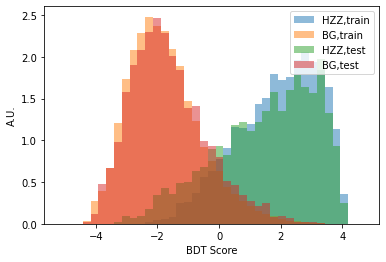

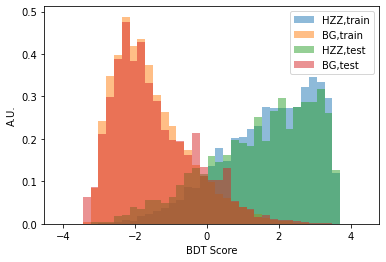

in 0 limit polp80 sklo 0.4225144386291504 Sig/BG 4.665113739203662 98.42177231507958 S/(S+B) 0.04525419204870654 S/sqrt(S+B)  0.4594735608095225
in 1 limit polp80 sklo 0.4372140600453669 Sig/BG 4.65262236003764 97.31018077966291 S/(S+B) 0.045630585044460006 S/sqrt(S+B)  0.46076228174564565
in 2 limit polp80 sklo 0.45191368146158345 Sig/BG 4.627639601705596 95.95156908986974 S/(S+B) 0.046009902661853154 S/sqrt(S+B)  0.4614295695212991
in 3 limit polp80 sklo 0.46661330287779995 Sig/BG 4.6126499467063695 93.95561584181269 S/(S+B) 0.04679650098139027 S/sqrt(S+B)  0.4646029248270553
in 4 limit polp80 sklo 0.48131292429401645 Sig/BG 4.605155119206756 92.14347524949699 S/(S+B) 0.047599176356882385 S/sqrt(S+B)  0.4681896951769892
in 5 limit polp80 sklo 0.496012545710233 Sig/BG 4.589332705596462 90.6909745754092 S/(S+B) 0.048166644677806944 S/sqrt(S+B)  0.470162480147771
in 6 limit polp80 sklo 0.5107121671264495 Sig/BG 4.578506843652576 87.1874912569765 S/(S+B) 0.04989328224416915 S/sqrt(S+B)  

in 58 limit polp80 sklo 1.2750924807697084 Sig/BG 3.7240965086966753 27.078692985873204 S/(S+B) 0.12090127452103595 S/sqrt(S+B)  0.6710052267611395
in 59 limit polp80 sklo 1.2897921021859249 Sig/BG 3.708274095086381 26.34102364303544 S/(S+B) 0.12340634804193464 S/sqrt(S+B)  0.6764795367290278
in 60 limit polp80 sklo 1.3044917236021414 Sig/BG 3.6916189228650182 25.59191941373865 S/(S+B) 0.12606464698463674 S/sqrt(S+B)  0.6821895897129943
in 61 limit polp80 sklo 1.319191345018358 Sig/BG 3.671632716199383 24.55879808278405 S/(S+B) 0.13005939379187925 S/sqrt(S+B)  0.6910356903194819
in 62 limit polp80 sklo 1.3338909664345746 Sig/BG 3.6499809923116118 24.05864606643445 S/(S+B) 0.1317272409265589 S/sqrt(S+B)  0.6933988214235675
in 63 limit polp80 sklo 1.3485905878507911 Sig/BG 3.630827544257045 23.488111476035556 S/(S+B) 0.1338853095078743 S/sqrt(S+B)  0.6972190972230821
in 64 limit polp80 sklo 1.3632902092670076 Sig/BG 3.6166706478688866 23.071332808292937 S/(S+B) 0.1355167183566089 S/sqrt(

in 140 limit polp80 sklo 2.480461436899463 Sig/BG 1.9319999776780605 2.319161081191851 S/(S+B) 0.45446407485479867 S/sqrt(S+B)  0.9370296593357925
in 142 limit polp80 sklo 2.5098606797318963 Sig/BG 1.8845327368471771 2.1575456775317434 S/(S+B) 0.4662286436956078 S/sqrt(S+B)  0.9373489968524163
in 143 limit polp80 sklo 2.524560301148113 Sig/BG 1.8612154957372695 2.021953353571007 S/(S+B) 0.4793032618369955 S/sqrt(S+B)  0.9445033923117662
best result_polp80 sklo 2.524560301148113 Sig/BG  1.8612154957372695 2.021953353571007 S/(S+B) 0.4793032618369955 S/sqrt(S+B) 0.9445033923117662
polp 80 numbers done
in 0 limit polm80 sklo new best value 0.8361270427703857 Sig/BG/ S/(S+B)  / S/sqrt(S+B)  25.0669382577762 560.0968657520134 0.042837472321437094 1.036245276853246
in 1 limit polm80 sklo new best value 0.8505885260788041 Sig/BG/ S/(S+B)  / S/sqrt(S+B)  24.9319590870291 546.3075111876242 0.04364537183511103 1.0431512953216138
in 2 limit polm80 sklo new best value 0.8650500093872223 Sig/BG/ S/

in 46 limit polm80 sklo new best value 1.501355274957628 Sig/BG/ S/(S+B)  / S/sqrt(S+B)  20.751958960667253 224.37343201902695 0.0846585450724944 1.3254548853183206
in 47 limit polm80 sklo new best value 1.5158167582660462 Sig/BG/ S/(S+B)  / S/sqrt(S+B)  20.63875062391162 220.51087723555975 0.08558483298153269 1.329046284030387
in 48 limit polm80 sklo new best value 1.5302782415744645 Sig/BG/ S/(S+B)  / S/sqrt(S+B)  20.5168339535594 211.56171491276473 0.08840469769300813 1.3467681698355003
in 49 limit polm80 sklo new best value 1.544739724882883 Sig/BG/ S/(S+B)  / S/sqrt(S+B)  20.42104228399694 206.27417976479046 0.09008148517396673 1.3563029962891102
in 50 limit polm80 sklo new best value 1.5592012081913011 Sig/BG/ S/(S+B)  / S/sqrt(S+B)  20.316542280837893 200.702002099948 0.09192234225303358 1.3665811914911636
in 51 limit polm80 sklo new best value 1.5736626914997194 Sig/BG/ S/(S+B)  / S/sqrt(S+B)  20.220750611275434 195.71465611993335 0.09364258931582137 1.3760535764094761
in 52 li

in 104 limit polm80 sklo new best value 2.34012130684589 Sig/BG/ S/(S+B)  / S/sqrt(S+B)  13.82447958458215 46.466253933962435 0.22929692139721494 1.7804242777111685
in 105 limit polm80 sklo new best value 2.354582790154308 Sig/BG/ S/(S+B)  / S/sqrt(S+B)  13.711271247826517 45.46543635078706 0.23170047480214584 1.7823883017632312
in 106 limit polm80 sklo new best value 2.3690442734627264 Sig/BG/ S/(S+B)  / S/sqrt(S+B)  13.585000410676003 43.58133870642632 0.2376398527610422 1.7967574954210552
in 109 limit polm80 sklo new best value 2.4124287233879813 Sig/BG/ S/(S+B)  / S/sqrt(S+B)  13.262792067602277 41.21031781309284 0.24347411221151 1.7969826165284184
in 112 limit polm80 sklo new best value 2.4558131733132362 Sig/BG/ S/(S+B)  / S/sqrt(S+B)  12.86656288895756 37.40448279399425 0.2559438084917525 1.8146947699264588
in 113 limit polm80 sklo new best value 2.4702746566216547 Sig/BG/ S/(S+B)  / S/sqrt(S+B)  12.701104550622404 36.26929802051745 0.2593628780603011 1.8149917440016674
in 114 l

In [17]:
#calculate renormalisation weights to plot normalized histograms, normalize everthing to sum_wpos
rescale_polp80_train_BG=sum_wpos_train_polp80/sum_wneg_train_polp80 
rescale_polp80_test_SIG=sum_wpos_train_polp80/sum_wpos_test_polp80
rescale_polp80_test_BG=sum_wpos_train_polp80/sum_wneg_test_polp80

ypred_polp80_test_skl_B=np.ma.masked_where(y_polp80_test==1,ypred_polp80_test_skl)
ypred_polp80_train_skl_B=np.ma.masked_where(y_polp80_train==1,ypred_polp80_train_skl)
ypred_polp80_test_skl_S=np.ma.masked_where(y_polp80_test==0,ypred_polp80_test_skl)
ypred_polp80_train_skl_S=np.ma.masked_where(y_polp80_train==0,ypred_polp80_train_skl)

ypred_polm80_test_skl_B=np.ma.masked_where(y_polm80_test==1,ypred_polm80_test_skl)
ypred_polm80_train_skl_B=np.ma.masked_where(y_polm80_train==1,ypred_polm80_train_skl)
ypred_polm80_test_skl_S=np.ma.masked_where(y_polm80_test==0,ypred_polm80_test_skl)
ypred_polm80_train_skl_S=np.ma.masked_where(y_polm80_train==0,ypred_polm80_train_skl)

num_plot_polp80_min=1.2*min(np.min(ypred_polp80_train_skl_B),np.min(ypred_polp80_test_skl_B))
num_plot_polp80_max=1.2*max(np.max(ypred_polp80_train_skl_B),np.max(ypred_polp80_test_skl_B))

bins_polp80 = np.linspace(num_plot_polp80_min,num_plot_polp80_max,40)   

num_plot_polm80_min=1.2*min(np.min(ypred_polm80_train_skl_B),np.min(ypred_polm80_test_skl_B))
num_plot_polm80_max=1.2*max(np.max(ypred_polm80_train_skl_B),np.max(ypred_polm80_test_skl_B))

bins_polm80 = np.linspace(num_plot_polm80_min,num_plot_polm80_max,40) 

sum_wpos_polm80_train = sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if y_polm80_train[i] == 1.0)
sum_wneg_polm80_train = sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if y_polm80_train[i] == 0.0)
sum_wpos_polm80_test = sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if y_polm80_test[i] == 1.0)
sum_wneg_polm80_test = sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if y_polm80_test[i] == 0.0)

#calculate renormalisation weights to plot normalized histograms, normalize everthing to sum_wpos
rescale_polm80_train_BG=sum_wpos_polm80_train/sum_wneg_polm80_train 
rescale_polm80_test_SIG=sum_wpos_polm80_train/sum_wpos_polm80_test
rescale_polm80_test_BG=sum_wpos_polm80_train/sum_wneg_polm80_test

ypred_polp80_train_skl_B=ypred_polp80_train_skl_B.filled(2.*np.min(ypred_polp80_train_skl_B))
ypred_polp80_test_skl_B=ypred_polp80_test_skl_B.filled(2.*np.min(ypred_polp80_test_skl_B))
ypred_polp80_train_skl_S=ypred_polp80_train_skl_S.filled(2.*np.max(ypred_polp80_train_skl_S))
ypred_polp80_test_skl_S=ypred_polp80_test_skl_S.filled(2.*np.max(ypred_polp80_test_skl_S))

ypred_polm80_train_skl_B=ypred_polm80_train_skl_B.filled(2.*np.min(ypred_polm80_train_skl_B))
ypred_polm80_test_skl_B=ypred_polm80_test_skl_B.filled(2.*np.min(ypred_polm80_test_skl_B))
ypred_polm80_train_skl_S=ypred_polm80_train_skl_S.filled(2.*np.max(ypred_polm80_train_skl_S))
ypred_polm80_test_skl_S=ypred_polm80_test_skl_S.filled(2.*np.max(ypred_polm80_test_skl_S))

plt.figure(1)
hist_S_polm80_train_skl = plt.hist(ypred_polm80_train_skl_S, bins_polm80, alpha=0.5,weights=weight_polm80_array_train,label='HZZ,train')
hist_B_polm80_train_skl = plt.hist(ypred_polm80_train_skl_B, bins_polm80, alpha=0.5,weights=rescale_polm80_train_BG*weight_polm80_array_train,label="BG,train")
hist_S_polm80_test_skl = plt.hist(ypred_polm80_test_skl_S, bins_polm80, alpha=0.5,weights=rescale_polm80_test_SIG*weight_polm80_array_test,label='HZZ,test')
hist_B_polm80_test_skl = plt.hist(ypred_polm80_test_skl_B, bins_polm80, alpha=0.5,weights=rescale_polm80_test_BG*weight_polm80_array_test,label="BG,test")
plt.legend(loc="upper right")
plt.xlabel('BDT Score')    
plt.ylabel('A.U.')
plt.savefig("BDT_training_testing_polm80.pdf")
plt.show()

plt.figure(2)
hist_S_polp80_train_skl = plt.hist(ypred_polp80_train_skl_S, bins_polp80, alpha=0.5,weights=weight_polp80_array_train,label='HZZ,train')
hist_B_polp80_train_skl = plt.hist(ypred_polp80_train_skl_B, bins_polp80, alpha=0.5,weights=rescale_polp80_train_BG*weight_polp80_array_train,label="BG,train")
hist_S_polp80_test_skl = plt.hist(ypred_polp80_test_skl_S, bins_polp80, alpha=0.5,weights=rescale_polp80_test_SIG*weight_polp80_array_test,label='HZZ,test')
hist_B_polp80_test_skl = plt.hist(ypred_polp80_test_skl_B, bins_polp80, alpha=0.5,weights=rescale_polp80_test_BG*weight_polp80_array_test,label="BG,test")
plt.legend(loc="upper right")
plt.xlabel('BDT Score')
plt.ylabel('A.U.')
#plt.savefig("BDT_training_testing_polp80.pdf")
plt.show()

"""

num_plot_polp80_min=1.2*min(np.min(ypred_polp80_train_skl_B),np.min(ypred_polp80_test_skl_B))
num_plot_polm80_min=1.2*min(np.min(ypred_polm80_train_skl_B),np.min(ypred_polm80_test_skl_B))
  
bins_polp80 = np.linspace(num_plot_polp80_min,num_plot_polp80_max,50)    
bins_polm80 = np.linspace(num_plot_polm80_min,num_plot_polm80_max,50)  
    
#ypred_polp80_train_skl_B=ypred_polp80_train_skl_B.filled(2.*np.min(ypred_polp80_train_skl_B))
#ypred_polp80_test_skl_B=ypred_polp80_test_skl_B.filled(2.*np.min(ypred_polp80_train_skl_B))
print(ypred_polp80_train_skl_S)
#ypred_polp80_train_skl_S=ypred_polp80_train_skl_S.filled(2.*np.max(ypred_polp80_train_skl_S))
#ypred_polp80_test_skl_S=ypred_polp80_test_skl_S.filled(2.*np.max(ypred_polp80_test_skl_S))
#for i in range(len(ypred_polp80_train_skl_B)):
#    print("B/S",ypred_polp80_train_skl_B[i],ypred_polp80_train_skl_S[i])

#ypred_polm80_train_skl_B=ypred_polm80_train_skl_B.filled(2.*np.min(ypred_polm80_train_skl_B))
#ypred_polm80_test_skl_B=ypred_polm80_test_skl_B.filled(2.*np.min(ypred_polm80_train_skl_B))
#ypred_polm80_train_skl_S=ypred_polm80_train_skl_S.filled(2.*np.max(ypred_polm80_train_skl_S))
#ypred_polm80_test_skl_S=ypred_polm80_test_skl_S.filled(2.*np.max(ypred_polm80_train_skl_S))

rescale_polm80_train_BG=sum_wpos_train_polm80/sum_wneg_train_polm80 
rescale_polm80_test_SIG=sum_wpos_train_polm80/sum_wpos_test_polm80
rescale_polm80_test_BG=sum_wpos_train_polm80/sum_wneg_test_polm80

plt.figure(1)
hist_S_polm80_train_skl = plt.hist(ypred_polm80_train_skl_S, bins_polm80, alpha=0.5,weights=weight_polm80_array_train,label='HZZ,train')
hist_B_polm80_train_skl = plt.hist(ypred_polm80_train_skl_B, bins_polm80, alpha=0.5,weights=rescale_polm80_train_BG*weight_polm80_array_train,label="BG,train")
hist_S_polm80_test_skl = plt.hist(ypred_polm80_test_skl_S, bins_polm80, alpha=0.5,weights=rescale_polm80_test_SIG*weight_polm80_array_test,label='HZZ,test')
hist_B_polm80_test_skl = plt.hist(ypred_polm80_test_skl_B, bins_polm80, alpha=0.5,weights=rescale_polm80_test_BG*weight_polm80_array_test,label="BG,test")
plt.legend(loc="upper right")
plt.show()



print ('min/max B/S train/test',np.min(ypred_polp80_train_skl_B),np.max(ypred_polp80_train_skl_B),np.min(ypred_polp80_train_skl_S),np.max(ypred_polp80_train_skl_S),np.min(ypred_polp80_test_skl_B),np.max(ypred_polp80_test_skl_B),np.min(ypred_polp80_test_skl_S),np.max(ypred_polp80_test_skl_S))

#plt.figure(3)
#hist_S_polp80_train = plt.hist(ypred_polp80_train_skl_S, bins_polp80, alpha=0.5,weights=weight_polp80_array_train,label='HZZ,train')
##hist_B_polp80_train = plt.hist(ypred_polp80_train_skl_B, bins_polp80, alpha=0.5,weights=rescale_polp80_train_BG*weight_polp80_array_train,label="BG,train")
#hist_S_polp80_test = plt.hist(ypred_polp80_test_skl_S, bins_polp80, alpha=0.5,weights=rescale_polp80_test_SIG*weight_polp80_array_test,label='HZZ,test')
#hist_B_polp80_test = plt.hist(ypred_polp80_test_skl_B, bins_polp80, alpha=0.5,weights=rescale_polp80_test_BG*weight_polp80_array_test,label="BG,test")
#plt.show()
"""
count_sig_polp80_test_skl = np.zeros(test_bins_BDT_polp80)
count_BG_polp80_test_skl=np.zeros(test_bins_BDT_polp80)
count_sig_polp80_train_skl = np.zeros(test_bins_BDT_polp80)
count_BG_polp80_train_skl = np.zeros(test_bins_BDT_polp80)
count_sig_polp80_test = np.zeros(test_bins_BDT_polp80)
count_BG_polp80_test=np.zeros(test_bins_BDT_polp80)
count_sig_polp80_train = np.zeros(test_bins_BDT_polp80)
count_BG_polp80_train = np.zeros(test_bins_BDT_polp80)

count_sig_polm80_test_skl = np.zeros(test_bins_BDT_polm80)
count_BG_polm80_test_skl=np.zeros(test_bins_BDT_polm80)
count_sig_polm80_train_skl = np.zeros(test_bins_BDT_polm80)
count_BG_polm80_train_skl = np.zeros(test_bins_BDT_polm80)

max_sig_polm80_skl=0
max_sig_polm80_skl_j=-1
max_sig_polp80_skl=0
max_sig_polp80_skl_j=-1

for j in range (len(pred_lim_polp80)):
    for i in range(len(y_polp80_test)):
        if (sel_HHZ_polp80_test[i]==1 and ypred_polp80_test_skl[i]>pred_lim_polp80[j]):
            count_sig_polp80_test_skl[j]+=weight_polp80_array_test.item(i) 
        elif (sel_HHZ_polp80_test[i]!=1 and ypred_polp80_test_skl[i]>pred_lim_polp80[j]):
            count_BG_polp80_test_skl[j]+=weight_polp80_array_test.item(i) 
    for i in range(len(y_polp80_train)):
        if (sel_HHZ_polp80_train[i]==1 and ypred_polp80_train_skl[i]>pred_lim_polp80[j]):
            count_sig_polp80_train_skl[j]+=weight_polp80_array_train.item(i) 
        elif (sel_HHZ_polp80_train[i]!=1 and ypred_polp80_train_skl[i]>pred_lim_polp80[j]):
            count_BG_polp80_train_skl[j]+=weight_polp80_array_train.item(i) 
    if (count_sig_polp80_test_skl[j]+count_BG_polp80_test_skl[j])>0 and ((count_sig_polp80_test_skl[j]+count_sig_polp80_train_skl[j])/math.sqrt(count_sig_polp80_test_skl[j]+count_sig_polp80_train_skl[j]+count_BG_polp80_test_skl[j]+count_BG_polp80_train_skl[j]) )>max_sig_polp80_skl :
        max_sig_polp80_skl=(count_sig_polp80_test_skl[j]+count_sig_polp80_train_skl[j])/math.sqrt(count_sig_polp80_test_skl[j]+count_sig_polp80_train_skl[j]+count_BG_polp80_test_skl[j]+count_BG_polp80_train_skl[j])
        max_sig_polp80_skl_j=j
        print("in",j,"limit polp80 sklo",pred_lim_polp80[max_sig_polp80_skl_j],'Sig/BG',count_sig_polp80_test_skl[j]+count_sig_polp80_train_skl[j],count_BG_polp80_test_skl[j]+count_BG_polp80_train_skl[j],"S/(S+B)", (count_sig_polp80_test_skl[j]+count_sig_polp80_train_skl[j])/(count_sig_polp80_test_skl[j]+count_sig_polp80_train_skl[j]+count_BG_polp80_test_skl[j]+count_BG_polp80_train_skl[j]),"S/sqrt(S+B) ",(count_sig_polp80_test_skl[j]+count_sig_polp80_train_skl[j])/math.sqrt(count_sig_polp80_test_skl[j]+count_sig_polp80_train_skl[j]+count_BG_polp80_test_skl[j]+count_BG_polp80_train_skl[j]))
print("best result_polp80 sklo",pred_lim_polp80[max_sig_polp80_skl_j],'Sig/BG ',count_sig_polp80_test_skl[max_sig_polp80_skl_j]+count_sig_polp80_train_skl[max_sig_polp80_skl_j],count_BG_polp80_test_skl[max_sig_polp80_skl_j]+count_BG_polp80_train_skl[max_sig_polp80_skl_j],"S/(S+B)",(count_sig_polp80_test_skl[max_sig_polp80_skl_j]+count_sig_polp80_train_skl[max_sig_polp80_skl_j])/(count_sig_polp80_test_skl[max_sig_polp80_skl_j]+count_sig_polp80_train_skl[max_sig_polp80_skl_j]+count_BG_polp80_test_skl[max_sig_polp80_skl_j]+count_BG_polp80_train_skl[max_sig_polp80_skl_j]),"S/sqrt(S+B)",(count_sig_polp80_test_skl[max_sig_polp80_skl_j]+count_sig_polp80_train_skl[max_sig_polp80_skl_j])/math.sqrt(count_sig_polp80_test_skl[max_sig_polp80_skl_j]+count_sig_polp80_train_skl[max_sig_polp80_skl_j]+count_BG_polp80_test_skl[max_sig_polp80_skl_j]+count_BG_polp80_train_skl[max_sig_polp80_skl_j]))
print ("polp 80 numbers done")

for j in range (len(pred_lim_polm80)):
    for i in range(len(y_polm80_test)):
        if (sel_HHZ_polm80_test[i]==1 and ypred_polm80_test_skl[i]>pred_lim_polm80[j]):
            count_sig_polm80_test_skl[j]+=weight_polm80_array_test.item(i) 
        elif (sel_HHZ_polm80_test[i]!=1 and ypred_polm80_test_skl[i]>pred_lim_polm80[j]):
            count_BG_polm80_test_skl[j]+=weight_polm80_array_test.item(i)
    for i in range(len(y_polm80_train)):
        if (sel_HHZ_polm80_train[i]==1 and ypred_polm80_train_skl[i]>pred_lim_polm80[j]):
            count_sig_polm80_train_skl[j]+=weight_polm80_array_train.item(i) 
        elif (sel_HHZ_polm80_train[i]!=1 and ypred_polm80_train_skl[i]>pred_lim_polm80[j]):
            count_BG_polm80_train_skl[j]+=weight_polm80_array_train.item(i) 
    if ((count_sig_polm80_test_skl[j]+count_BG_polm80_test_skl[j])>0 and (((count_sig_polm80_test_skl[j]+count_sig_polm80_train_skl[j])/math.sqrt(count_sig_polm80_test_skl[j]+count_sig_polm80_train_skl[j]+count_BG_polm80_test_skl[j]+count_BG_polm80_train_skl[j]))>max_sig_polm80_skl)):
        max_sig_polm80_skl=(count_sig_polm80_test_skl[j]+count_sig_polm80_train_skl[j])/math.sqrt(count_sig_polm80_test_skl[j]+count_sig_polm80_train_skl[j]+count_BG_polm80_test_skl[j]+count_BG_polm80_train_skl[j])
        max_sig_polm80_skl_j=j
        print("in",j,"limit polm80 sklo new best value",pred_lim_polm80[max_sig_polm80_skl_j],'Sig/BG/ S/(S+B)  / S/sqrt(S+B) ',count_sig_polm80_test_skl[j]+count_sig_polm80_train_skl[j],count_BG_polm80_test_skl[j]+count_BG_polm80_train_skl[max_sig_polm80_skl_j],(count_sig_polm80_test_skl[max_sig_polm80_skl_j]+count_sig_polm80_train_skl[max_sig_polm80_skl_j])/(count_sig_polm80_test_skl[max_sig_polm80_skl_j]+count_sig_polm80_train_skl[max_sig_polm80_skl_j]+count_BG_polm80_test_skl[max_sig_polm80_skl_j]+count_BG_polm80_train_skl[max_sig_polm80_skl_j]),(count_sig_polm80_test_skl[max_sig_polm80_skl_j]+count_sig_polm80_train_skl[max_sig_polm80_skl_j])/math.sqrt(count_sig_polm80_test_skl[max_sig_polm80_skl_j]+count_sig_polm80_train_skl[max_sig_polm80_skl_j]+count_BG_polm80_test_skl[max_sig_polm80_skl_j]+count_BG_polm80_train_skl[max_sig_polm80_skl_j]))
print("best result_polm80 sklo",pred_lim_polm80[max_sig_polm80_skl_j],"Sig/BG "
      ,count_sig_polm80_test_skl[max_sig_polm80_skl_j]+count_sig_polm80_train_skl[max_sig_polm80_skl_j]
      ,count_BG_polm80_test_skl[max_sig_polm80_skl_j]+count_BG_polm80_train_skl[max_sig_polm80_skl_j],"S/(S+B)",
      (count_sig_polm80_test_skl[max_sig_polm80_skl_j]+count_sig_polm80_train_skl[max_sig_polm80_skl_j])/(count_sig_polm80_test_skl[max_sig_polm80_skl_j]+count_sig_polm80_train_skl[max_sig_polm80_skl_j]+count_BG_polm80_test_skl[max_sig_polm80_skl_j]+count_BG_polm80_train_skl[max_sig_polm80_skl_j]),
      "S/sqrt(S+B)",(count_sig_polm80_test_skl[max_sig_polm80_skl_j]+count_sig_polm80_train_skl[max_sig_polm80_skl_j])/math.sqrt(count_sig_polm80_test_skl[max_sig_polm80_skl_j]+count_sig_polm80_train_skl[max_sig_polm80_skl_j]+count_BG_polm80_test_skl[max_sig_polm80_skl_j]+count_BG_polm80_train_skl[max_sig_polm80_skl_j]))
  

In [ ]:
"""
import matplotlib.pyplot as plt

sum_wpos_polm80_train = sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if y_polm80_train[i] == 1.0)
sum_wneg_polm80_train = sum(weight_polm80_array_train.item(i) for i in range(len(y_polm80_train)) if y_polm80_train[i] == 0.0)
sum_wpos_polm80_test = sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if y_polm80_test[i] == 1.0)
sum_wneg_polm80_test = sum(weight_polm80_array_test.item(i) for i in range(len(y_polm80_test)) if y_polm80_test[i] == 0.0)

#calculate renormalisation weights to plot normalized histograms, normalize everthing to sum_wpos
rescale_polm80_train_BG=sum_wpos_polm80_train/sum_wneg_polm80_train 
rescale_polm80_test_SIG=sum_wpos_polm80_train/sum_wpos_polm80_test
rescale_polm80_test_BG=sum_wpos_polm80_train/sum_wneg_polm80_test

modelfile_polm80 = '/Users/matthiasweber/jupytermacros/HHZModel_polm80.model'
bst_polm80 = xgb.Booster(model_file = modelfile_polm80)
ypred_polm80_test = bst_polm80.predict( xgmat_polm80_test )
ypred_polm80_train = bst_polm80.predict( xgmat_polm80_train )
label_polm80 = xgmat_polm80_train.get_label()

ypred_polm80_test_B=np.ma.masked_where(y_polm80_test==1,ypred_polm80_test)
ypred_polm80_test_S=np.ma.masked_where(y_polm80_test==0,ypred_polm80_test)
ypred_polm80_train_B=np.ma.masked_where(y_polm80_train==1,ypred_polm80_train)
ypred_polm80_train_S=np.ma.masked_where(y_polm80_train==0,ypred_polm80_train)
print ('min/max B/S train/test',np.min(ypred_polm80_train_B),np.max(ypred_polm80_train_B),np.min(ypred_polm80_train_S),np.max(ypred_polm80_train_S),np.min(ypred_polm80_test_B),np.max(ypred_polm80_test_B),np.min(ypred_polm80_test_S),np.max(ypred_polm80_test_S))

bins_polm80 = np.linspace(-1.2*np.min(ypred_polm80_train_B),1.2*np.max(ypred_polm80_train_S),50)
ypred_polm80_train_B=ypred_polm80_train_B.filled(-2.*np.min(ypred_polm80_train_B))
ypred_polm80_train_S=ypred_polm80_train_S.filled(2.*np.max(ypred_polm80_train_S))
ypred_polm80_test_B=ypred_polm80_test_B.filled(-2.*np.min(ypred_polm80_train_B))
ypred_polm80_test_S=ypred_polm80_test_S.filled(2.*np.max(ypred_polm80_train_S))
hist_S_polm80_train = plt.hist(ypred_polm80_train_S, bins_polm80, alpha=0.5,weights=weight_polm80_array_train,label='HZZ,train')
hist_B_polm80_train = plt.hist(ypred_polm80_train_B, bins_polm80, alpha=0.5,weights=rescale_polm80_train_BG*weight_polm80_array_train,label="BG,train")
hist_S_polm80_test = plt.hist(ypred_polm80_test_S, bins_polm80, alpha=0.5,weights=rescale_polm80_test_SIG*weight_polm80_array_test,label='HZZ,test')
hist_B_polm80_test = plt.hist(ypred_polm80_test_B, bins_polm80, alpha=0.5,weights=rescale_polm80_test_BG*weight_polm80_array_test,label="BG,test")
plt.legend(loc="upper right")
plt.show()
count_sig_polm80_test = np.zeros(test_bins_BDT_polm80)
count_BG_polm80_test_skl=np.zeros(test_bins_BDT_polm80)
count_sig_polm80_train = np.zeros(test_bins_BDT_polm80)
count_BG_polm80_train_skl = np.zeros(test_bins_BDT_polm80)
"""
"""
for i in range(len(ypred_polm80_test)):
    if (y_polm80_test[i]==1):
        for j in range (len(pred_lim_polm80)):
            if (ypred_polm80_test[i]>pred_lim_polm80[j]):
                count_sig_polm80_test[j]=count_sig_polm80_test[j]+weight_polm80_array_test.item(i)
    else:
        for j in range (len(pred_lim_polm80)):
            if (ypred_polm80_test[i]>pred_lim_polm80[j]):
                count_BG_polm80_test_skl[j]=count_BG_polm80_test_skl[j]+weight_polm80_array_test.item(i)
for i in range(len(ypred_polm80_train)):
    if (y_polm80_train[i]==1):
        for j in range (len(pred_lim_polm80)):
            if (ypred_polm80_train[i]>pred_lim_polm80[j]):
                count_sig_polm80_train[j]=count_sig_polm80_train[j]+weight_polm80_array_train.item(i)
    else:
        for j in range (len(pred_lim_polm80)):
            if (ypred_polm80_train[i]>pred_lim_polm80[j]):
                count_BG_polm80_train_skl[j]=count_BG_polm80_train_skl[j]+weight_polm80_array_train.item(i)
max_sig_polm80=0
max_sig_polm80_j=-1
for j in range (len(pred_lim_polm80)):
    if (count_sig_polm80_train[j]+count_sig_polm80_test[j]+count_BG_polm80_train_skl[j]+count_BG_polm80_test_skl[j])>0 and ((count_sig_polm80_train[j]+count_sig_polm80_test[j])/math.sqrt(count_sig_polm80_train[j]+count_sig_polm80_test[j]+count_BG_polm80_train_skl[j]+count_BG_polm80_test_skl[j]))>max_sig_polm80:
        max_sig_polm80=(count_sig_polm80_train[j]+count_sig_polm80_test[j])/math.sqrt(count_sig_polm80_train[j]+count_sig_polm80_test[j]+count_BG_polm80_train_skl[j]+count_BG_polm80_test_skl[j])
        max_sig_polm80_j=j
"""
print("best result_polm80",pred_lim_polm80[max_sig_polm80_j],'Sig/BG/ S/(S+B)  / S/sqrt(S+B) ',count_sig_polm80_train[max_sig_polm80_j]+count_sig_polm80_test[max_sig_polm80_j],count_BG_polm80_train_skl[max_sig_polm80_j]+count_BG_polm80_test_skl[max_sig_polm80_j],(count_sig_polm80_train[max_sig_polm80_j]+count_sig_polm80_test[max_sig_polm80_j])/(count_sig_polm80_train[max_sig_polm80_j]+count_sig_polm80_test[max_sig_polm80_j]+count_BG_polm80_train_skl[max_sig_polm80_j]+count_BG_polm80_test_skl[max_sig_polm80_j]),(count_sig_polm80_train[max_sig_polm80_j]+count_sig_polm80_test[max_sig_polm80_j])/math.sqrt(count_sig_polm80_train[max_sig_polm80_j]+count_sig_polm80_test[max_sig_polm80_j]+count_BG_polm80_train_skl[max_sig_polm80_j]+count_BG_polm80_test_skl[max_sig_polm80_j]))

In [18]:
file_polp80_hhz_signal_AllEvents=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polp80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_hhqq_14365_AllEvents.root")
tree_polp80_hhz_signal_AllEvents = file_polp80_hhz_signal_AllEvents["MVATrainingVariables"]

df_polp80_HHZ_AllEvents=tree_polp80_hhz_signal_AllEvents.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                                    "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                                    "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                                    "LTag_sum_all","jet*_E","jet*_theta"])
data_polp80_HHZ_AllEvents=df_polp80_HHZ_AllEvents.iloc[:,1:]
weight_polp80_HHZ_AllEvents = df_polp80_HHZ_AllEvents.iloc[:,0]
weight_polp80_array_HHZ_AllEvents=np.asarray(weight_polp80_HHZ_AllEvents)
xgmat_polp80_HHZ_AllEvents = xgb.DMatrix( data_polp80_HHZ_AllEvents, label=y_polp80_train, missing = -999.0, weight=weight_polp80_HHZ_AllEvents )
bst_polp80 = xgb.Booster()
bst_polp80.load_model(modelfile_polp80_sklearn)
ypred_polp80_HHZ_AllEvents= bst_polp80.predict( xgmat_polp80_HHZ_AllEvents )
#print(ypred_polp80_HHZ_AllEvents.shape,ypred_polp80_test_skl.shape,ypred_polp80_train_skl.shape)
#print(ypred_polm80_HHZ_AllEvents.shape,ypred_polm80_test_skl.shape,ypred_polm80_train_skl.shape)
count_sig_polp80_HHZ_AllEvents = np.zeros(test_bins_BDT_polp80)
for i in range(len(ypred_polp80_HHZ_AllEvents)):
        for j in range (len(pred_lim_polp80)):
            if (ypred_polp80_HHZ_AllEvents[i]>pred_lim_polp80[j]):
                count_sig_polp80_HHZ_AllEvents[j]+=weight_polp80_array_HHZ_AllEvents.item(i)
max_sig_polp80_HHZ_All=0
max_sig_polp80_HHZ_All_j=-1
for j in range (len(pred_lim_polp80)):
    if(count_sig_polp80_HHZ_AllEvents[j]<(count_sig_polp80_train_skl[j]+count_sig_polp80_test_skl[j])):
        print("all should be more than bbbbqq events",count_sig_polp80_HHZ_AllEvents[j],count_sig_polp80_train_skl[j]+count_sig_polp80_test_skl[j])
    if (count_sig_polp80_HHZ_AllEvents[j]/math.sqrt(count_sig_polp80_HHZ_AllEvents[j]+count_BG_polp80_train_skl[j]+count_BG_polp80_test_skl[j]))>max_sig_polp80_HHZ_All:
        max_sig_polp80_HHZ_All=count_sig_polp80_HHZ_AllEvents[j]/math.sqrt(count_sig_polp80_HHZ_AllEvents[j]+count_BG_polp80_train_skl[j]+count_BG_polp80_test_skl[j])
        max_sig_polp80_HHZ_All_j=j
print("best result_polp80",pred_lim_polp80[max_sig_polp80_HHZ_All_j],'Sig/BG/ S/(S+B)  / S/sqrt(S+B) ',count_sig_polp80_HHZ_AllEvents[max_sig_polp80_HHZ_All_j],count_BG_polp80_train_skl[max_sig_polp80_HHZ_All_j]+count_BG_polp80_test_skl[max_sig_polp80_HHZ_All_j],count_sig_polp80_HHZ_AllEvents[max_sig_polp80_HHZ_All_j]/(count_sig_polp80_HHZ_AllEvents[max_sig_polp80_HHZ_All_j]+count_BG_polp80_train_skl[max_sig_polp80_HHZ_All_j]+count_BG_polp80_test_skl[max_sig_polp80_HHZ_All_j]),count_sig_polp80_HHZ_AllEvents[max_sig_polp80_HHZ_All_j]/math.sqrt(count_sig_polp80_HHZ_AllEvents[max_sig_polp80_HHZ_All_j]+count_BG_polp80_train_skl[max_sig_polp80_HHZ_All_j]+count_BG_polp80_test_skl[max_sig_polp80_HHZ_All_j]))
#now do the negativ results
file_polm80_hhz_signal_AllEvents=uproot.open("/Users/matthiasweber/rootfilesHHZ/HHZAnalyzer/190904Prod/VLC11_NJets6_finalAnalysis/polm80/NTuplesAnalysis_E_theta_BTag3_2_20_tight_Mass_Cuts/ntuple_HHZ_ECut_j1_150_j2_100_j4_50_dTheta12_80_BTag3_2_20_M2_75_M3_50_150_hhqq_14364_AllEvents.root")
tree_polm80_hhz_signal_AllEvents = file_polm80_hhz_signal_AllEvents["MVATrainingVariables"]

df_polm80_HHZ_AllEvents=tree_polm80_hhz_signal_AllEvents.pandas.df(["weight","comb_jet*_mass","comb_jet*_BTagMax","comb_jet*LTagMax",
                                                                    "comb_jet1_dalpha","comb_jet2_dalpha","comb_jet1_CTagMax",
                                                                    "comb_jet2_CTagMax", "y*", "BTag_sum_max2","BTag_sum_max3",
                                                                    "LTag_sum_all","jet*_E","jet*_theta"])
data_polm80_HHZ_AllEvents=df_polm80_HHZ_AllEvents.iloc[:,1:]
weight_polm80_HHZ_AllEvents = df_polm80_HHZ_AllEvents.iloc[:,0]
weight_polm80_array_HHZ_AllEvents=np.asarray(weight_polm80_HHZ_AllEvents)
xgmat_polm80_HHZ_AllEvents = xgb.DMatrix( data_polm80_HHZ_AllEvents, label=y_polm80_train, missing = -999.0, weight=weight_polm80_HHZ_AllEvents )
bst_polm80 = xgb.Booster()
bst_polm80.load_model(modelfile_polm80_sklearn)
ypred_polm80_HHZ_AllEvents= bst_polm80.predict( xgmat_polm80_HHZ_AllEvents )
count_sig_polm80_HHZ_AllEvents = np.zeros(test_bins_BDT_polm80)
for i in range(len(ypred_polm80_HHZ_AllEvents)):
        for j in range (len(pred_lim_polm80)):
            if (ypred_polm80_HHZ_AllEvents[i]>pred_lim_polm80[j]):
                count_sig_polm80_HHZ_AllEvents[j]+=weight_polm80_array_HHZ_AllEvents.item(i)
max_sig_polm80_HHZ_All=0
max_sig_polm80_HHZ_All_j=-1
for j in range (len(pred_lim_polm80)):
    if(count_sig_polm80_HHZ_AllEvents[j]<(count_sig_polm80_train_skl[j]+count_sig_polm80_test_skl[j])):
        print("all polm80 should be more than bbbbqq events",count_sig_polm80_HHZ_AllEvents[j],count_sig_polm80_train_skl[j]+count_sig_polm80_test_skl[j])
    if (count_sig_polm80_HHZ_AllEvents[j]/math.sqrt(count_sig_polm80_HHZ_AllEvents[j]+count_BG_polm80_train_skl[j]+count_BG_polm80_test_skl[j]))>max_sig_polm80_HHZ_All:
        max_sig_polm80_HHZ_All=(count_sig_polm80_HHZ_AllEvents[j])/math.sqrt(count_sig_polm80_HHZ_AllEvents[j]+count_BG_polm80_train_skl[j]+count_BG_polm80_test_skl[j])
        max_sig_polm80_HHZ_All_j=j
print("best result_polm80",pred_lim_polm80[max_sig_polm80_HHZ_All_j],
      'Sig/BG/ S/(S+B)  / S/sqrt(S+B) ',count_sig_polm80_HHZ_AllEvents[max_sig_polm80_HHZ_All_j],count_BG_polm80_train_skl[max_sig_polm80_HHZ_All_j]+count_BG_polm80_test_skl[max_sig_polm80_HHZ_All_j],
      count_sig_polm80_HHZ_AllEvents[max_sig_polm80_HHZ_All_j]/(count_sig_polm80_HHZ_AllEvents[max_sig_polm80_HHZ_All_j]+count_BG_polm80_train_skl[max_sig_polm80_HHZ_All_j]+count_BG_polm80_test_skl[max_sig_polm80_HHZ_All_j]),
      count_sig_polm80_HHZ_AllEvents[max_sig_polm80_HHZ_All_j]/math.sqrt(count_sig_polm80_HHZ_AllEvents[max_sig_polm80_HHZ_All_j]+count_BG_polm80_train_skl[max_sig_polm80_HHZ_All_j]+count_BG_polm80_test_skl[max_sig_polm80_HHZ_All_j]))

max_sig_polm80_polp80_HHZ_All=0
max_sig_polm80_comb_HHZ_All_j=-1
max_sig_polp80_comb_HHZ_All_i=-1

for j in range(len(pred_lim_polm80)):
    #print("all, sig polm80 ",j,count_sig_polm80_HHZ_AllEvents[j],count_sig_polm80_test_skl[j]+count_sig_polm80_train_skl[j])
    for i in range(len(pred_lim_polp80)):
        #print("all, sig polp80 ",i,count_sig_polp80_HHZ_AllEvents[i],count_sig_polp80_test_skl[i]+count_sig_polp80_train_skl[i])
        if (count_sig_polm80_HHZ_AllEvents[j]+count_sig_polp80_HHZ_AllEvents[i])>0 and ((count_sig_polm80_HHZ_AllEvents[j]+count_sig_polp80_HHZ_AllEvents[i])/math.sqrt(count_sig_polm80_HHZ_AllEvents[j]+count_sig_polp80_HHZ_AllEvents[i]+count_BG_polm80_train_skl[j]+count_BG_polm80_test_skl[j]+count_BG_polp80_train_skl[i]+count_BG_polp80_test_skl[i]))>max_sig_polm80_polp80_HHZ_All:
            max_sig_polm80_polp80_HHZ_All=(count_sig_polm80_HHZ_AllEvents[j]+count_sig_polp80_HHZ_AllEvents[i])/math.sqrt(count_sig_polm80_HHZ_AllEvents[j]+count_sig_polp80_HHZ_AllEvents[i]+count_BG_polm80_train_skl[j]+count_BG_polm80_test_skl[j]+count_BG_polp80_train_skl[i]+count_BG_polp80_test_skl[i])
            max_sig_polm80_comb_HHZ_All_j=j
            max_sig_polp80_comb_HHZ_All_i=i   
            
count_tot_hhz_polp80_skl=0
count_tot_hzqq_polp80_skl=0
count_tot_ee_qq_polp80_skl=0
count_tot_ee_qqqq_polp80_skl=0
count_tot_ee_qqqqqq_polp80_skl=0
count_tot_WWH_qqqqH_polp80_skl=0
count_tot_ZZH_qqqqH_polp80_skl=0
count_tot_hhz_polm80_skl=0
count_tot_hzqq_polm80_skl=0
count_tot_ee_qq_polm80_skl=0
count_tot_ee_qqqq_polm80_skl=0
count_tot_ee_qqqqqq_polm80_skl=0
count_tot_WWH_qqqqH_polm80_skl=0
count_tot_ZZH_qqqqH_polm80_skl=0

for i1 in range(len(y_polm80_test)):
    if sel_HHZ_polm80_test[i1]==1 and ypred_polm80_test_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_hhz_polm80_skl+=weight_polm80_array_test.item(i1) 
    if sel_hzqq_polm80_test[i1]==1 and ypred_polm80_test_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_hzqq_polm80_skl+=weight_polm80_array_test.item(i1) 
    if sel_ee_qq_polm80_test[i1]==1 and ypred_polm80_test_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_ee_qq_polm80_skl+=weight_polm80_array_test.item(i1) 
    if sel_ee_qqqq_polm80_test[i1]==1 and ypred_polm80_test_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_ee_qqqq_polm80_skl+=weight_polm80_array_test.item(i1) 
    if sel_ee_qqqqqq_polm80_test[i1]==1 and ypred_polm80_test_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_ee_qqqqqq_polm80_skl+=weight_polm80_array_test.item(i1) 
    if sel_WWH_qqqqH_polm80_test[i1]==1 and ypred_polm80_test_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_WWH_qqqqH_polm80_skl+=weight_polm80_array_test.item(i1) 
    if sel_ZZH_qqqqH_polm80_test[i1]==1 and ypred_polm80_test_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_ZZH_qqqqH_polm80_skl+=weight_polm80_array_test.item(i1) 
for i1 in range(len(y_polm80_train)):
    if sel_HHZ_polm80_train[i1]==1 and ypred_polm80_train_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_hhz_polm80_skl+=weight_polm80_array_train.item(i1) 
    if sel_hzqq_polm80_train[i1]==1 and ypred_polm80_train_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_hzqq_polm80_skl+=weight_polm80_array_train.item(i1) 
    if sel_ee_qq_polm80_train[i1]==1 and ypred_polm80_train_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_ee_qq_polm80_skl+=weight_polm80_array_train.item(i1) 
    if sel_ee_qqqq_polm80_train[i1]==1 and ypred_polm80_train_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_ee_qqqq_polm80_skl+=weight_polm80_array_train.item(i1) 
    if sel_ee_qqqqqq_polm80_train[i1]==1 and ypred_polm80_train_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_ee_qqqqqq_polm80_skl+=weight_polm80_array_train.item(i1) 
    if sel_WWH_qqqqH_polm80_train[i1]==1 and ypred_polm80_train_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_WWH_qqqqH_polm80_skl+=weight_polm80_array_train.item(i1) 
    if sel_ZZH_qqqqH_polm80_train[i1]==1 and ypred_polm80_train_skl[i1]>pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j]:
        count_tot_ZZH_qqqqH_polm80_skl+=weight_polm80_array_train.item(i1) 
for i1 in range(len(y_polp80_test)):
    if sel_HHZ_polp80_test[i1]==1 and ypred_polp80_test_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_hhz_polp80_skl+=weight_polp80_array_test.item(i1) 
    if sel_hzqq_polp80_test[i1]==1 and ypred_polp80_test_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_hzqq_polp80_skl+=weight_polp80_array_test.item(i1) 
    if sel_ee_qq_polp80_test[i1]==1 and ypred_polp80_test_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_ee_qq_polp80_skl+=weight_polp80_array_test.item(i1) 
    if sel_ee_qqqq_polp80_test[i1]==1 and ypred_polp80_test_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_ee_qqqq_polp80_skl+=weight_polp80_array_test.item(i1) 
    if sel_ee_qqqqqq_polp80_test[i1]==1 and ypred_polp80_test_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_ee_qqqqqq_polp80_skl+=weight_polp80_array_test.item(i1) 
    if sel_WWH_qqqqH_polp80_test[i1]==1 and ypred_polp80_test_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_WWH_qqqqH_polp80_skl+=weight_polp80_array_test.item(i1) 
    if sel_ZZH_qqqqH_polp80_test[i1]==1 and ypred_polp80_test_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_ZZH_qqqqH_polp80_skl+=weight_polp80_array_test.item(i1) 
for i1 in range(len(y_polp80_train)):
    if sel_HHZ_polp80_train[i1]==1 and ypred_polp80_train_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_hhz_polp80_skl+=weight_polp80_array_train.item(i1) 
    if sel_hzqq_polp80_train[i1]==1 and ypred_polp80_train_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_hzqq_polp80_skl+=weight_polp80_array_train.item(i1) 
    if sel_ee_qq_polp80_train[i1]==1 and ypred_polp80_train_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_ee_qq_polp80_skl+=weight_polp80_array_train.item(i1) 
    if sel_ee_qqqq_polp80_train[i1]==1 and ypred_polp80_train_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_ee_qqqq_polp80_skl+=weight_polp80_array_train.item(i1) 
    if sel_ee_qqqqqq_polp80_train[i1]==1 and ypred_polp80_train_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_ee_qqqqqq_polp80_skl+=weight_polp80_array_train.item(i1) 
    if sel_WWH_qqqqH_polp80_train[i1]==1 and ypred_polp80_train_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_WWH_qqqqH_polp80_skl+=weight_polp80_array_train.item(i1) 
    if sel_ZZH_qqqqH_polp80_train[i1]==1 and ypred_polp80_train_skl[i1]>pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i]:
        count_tot_ZZH_qqqqH_polp80_skl+=weight_polp80_array_train.item(i1)       
            
print("best result_polm80_polp80 combined",pred_lim_polm80[max_sig_polm80_comb_HHZ_All_j],pred_lim_polp80[max_sig_polp80_comb_HHZ_All_i],      
      'Sig/BG/ S/(S+B)  / S/sqrt(S+B) ',count_sig_polp80_HHZ_AllEvents[max_sig_polp80_comb_HHZ_All_i]+count_sig_polm80_HHZ_AllEvents[max_sig_polm80_comb_HHZ_All_j],count_BG_polp80_train_skl[max_sig_polp80_comb_HHZ_All_i]+count_BG_polp80_test_skl[max_sig_polp80_comb_HHZ_All_i]+count_BG_polm80_train_skl[max_sig_polm80_comb_HHZ_All_j]+count_BG_polm80_test_skl[max_sig_polm80_comb_HHZ_All_j],
      (count_sig_polp80_HHZ_AllEvents[max_sig_polp80_comb_HHZ_All_i]+count_sig_polm80_HHZ_AllEvents[max_sig_polm80_comb_HHZ_All_j])/(count_sig_polp80_HHZ_AllEvents[max_sig_polp80_comb_HHZ_All_i]+count_sig_polm80_HHZ_AllEvents[max_sig_polm80_comb_HHZ_All_j]+count_BG_polp80_train_skl[max_sig_polp80_comb_HHZ_All_i]+count_BG_polp80_test_skl[max_sig_polp80_comb_HHZ_All_i]+count_BG_polm80_train_skl[max_sig_polm80_comb_HHZ_All_j]+count_BG_polm80_test_skl[max_sig_polm80_comb_HHZ_All_j]),
      (count_sig_polp80_HHZ_AllEvents[max_sig_polp80_comb_HHZ_All_i]+count_sig_polm80_HHZ_AllEvents[max_sig_polm80_comb_HHZ_All_j])/math.sqrt(count_sig_polp80_HHZ_AllEvents[max_sig_polp80_comb_HHZ_All_i]+count_sig_polm80_HHZ_AllEvents[max_sig_polm80_comb_HHZ_All_j]+count_BG_polp80_train_skl[max_sig_polp80_comb_HHZ_All_i]+count_BG_polp80_test_skl[max_sig_polp80_comb_HHZ_All_i]+count_BG_polm80_train_skl[max_sig_polm80_comb_HHZ_All_j]+count_BG_polm80_test_skl[max_sig_polm80_comb_HHZ_All_j]))
print("all sig/hzqq/qq/qqqq/qqqqqq/WWH/ZZH",count_tot_hhz_polp80_skl+count_tot_hhz_polm80_skl,count_tot_hzqq_polp80_skl+count_tot_hzqq_polm80_skl,count_tot_ee_qq_polp80_skl+count_tot_ee_qq_polm80_skl,
     count_tot_ee_qqqq_polp80_skl+count_tot_ee_qqqq_polm80_skl,count_tot_ee_qqqqqq_polp80_skl+count_tot_ee_qqqqqq_polm80_skl,
     count_tot_WWH_qqqqH_polp80_skl+count_tot_WWH_qqqqH_polm80_skl,count_tot_ZZH_qqqqH_polp80_skl+count_tot_ZZH_qqqqH_polm80_skl)


best result_polp80 2.524560301148113 Sig/BG/ S/(S+B)  / S/sqrt(S+B)  2.205977560719475 2.021953353571007 0.5217629155820005 1.0728454146751352
best result_polm80 2.716119872864766 Sig/BG/ S/(S+B)  / S/sqrt(S+B)  12.12635453324765 19.77748671337031 0.38009073702161594 2.146884960105574
best result_polm80_polp80 combined 2.716119872864766 2.480461436899463 Sig/BG/ S/(S+B)  / S/sqrt(S+B)  14.422270023962483 22.09664779456216 0.39492599686638635 2.386572723863571
all sig/hzqq/qq/qqqq/qqqqqq/WWH/ZZH 12.355875292792916 1.5137454271316528 0 4.0200487077236176 10.342850077169714 1.0441400706768036 5.175863511860371
